/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


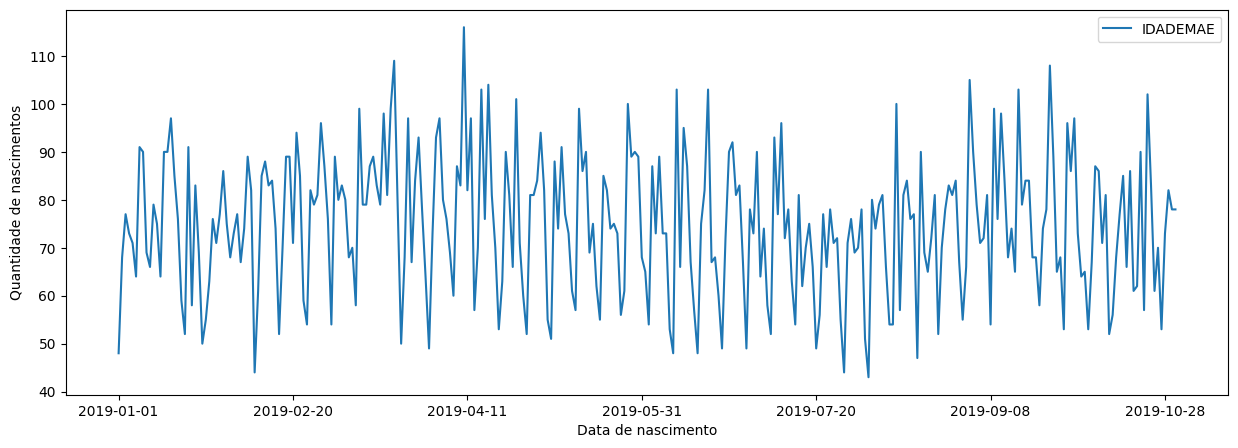

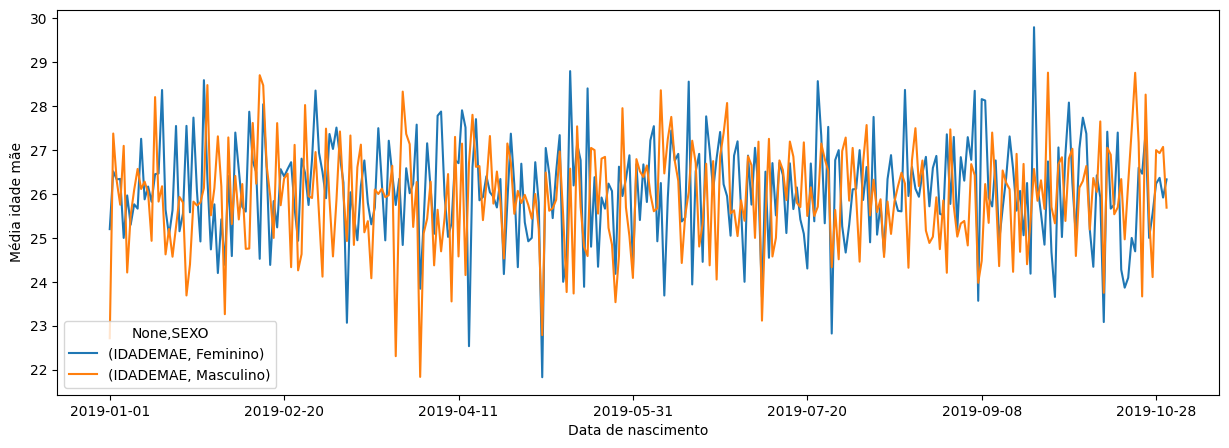

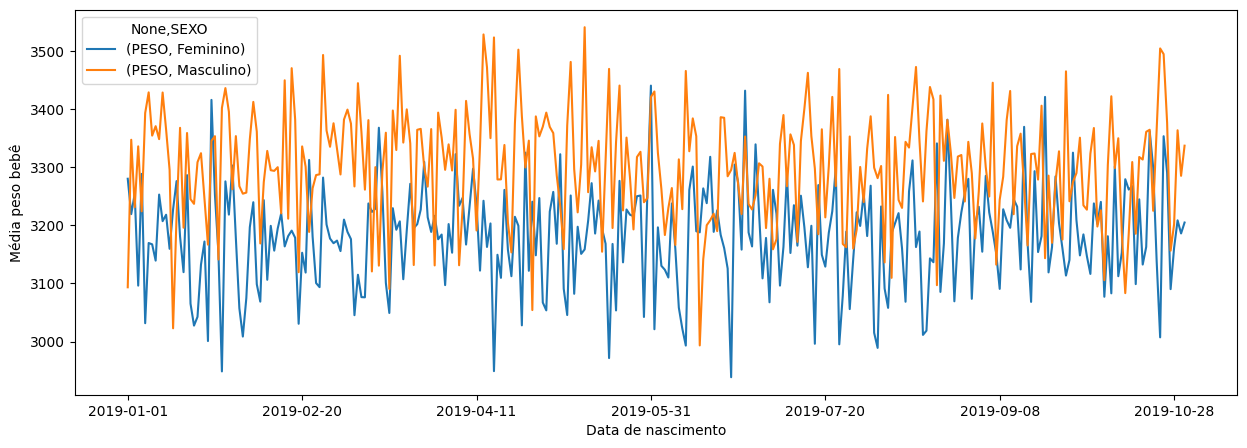

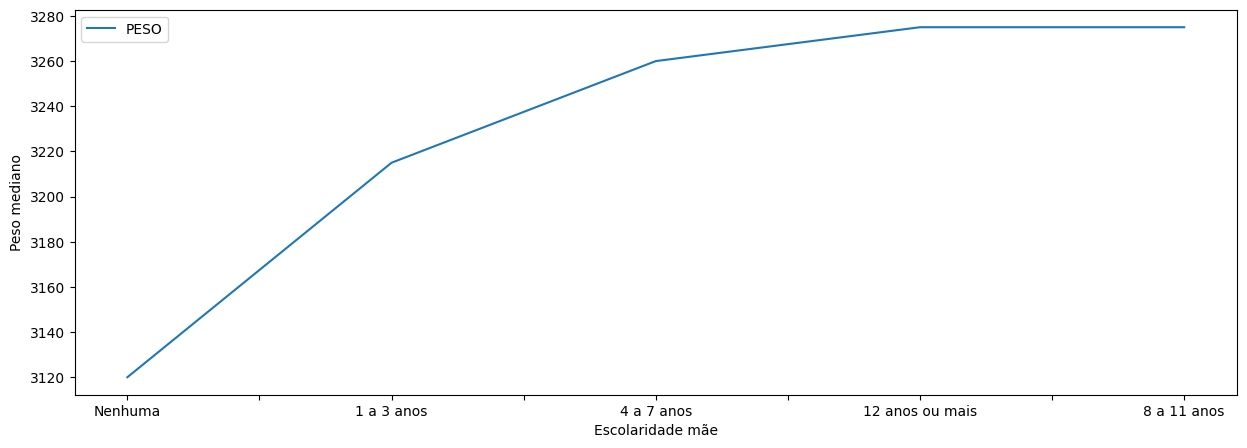

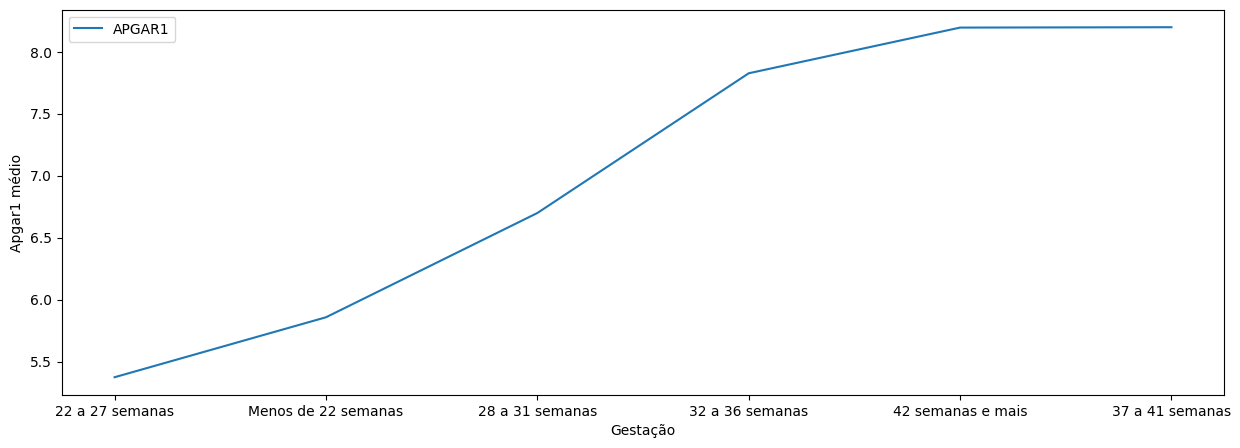

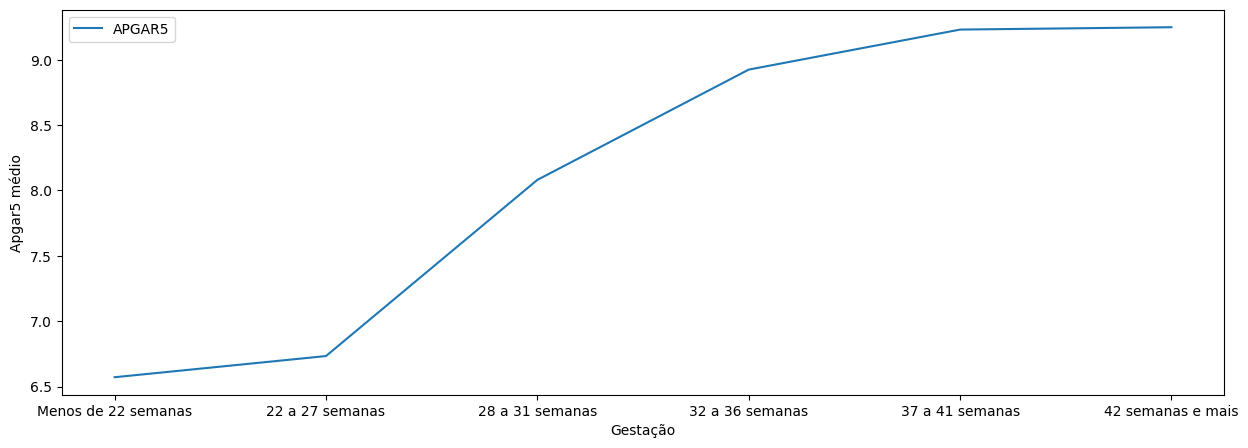

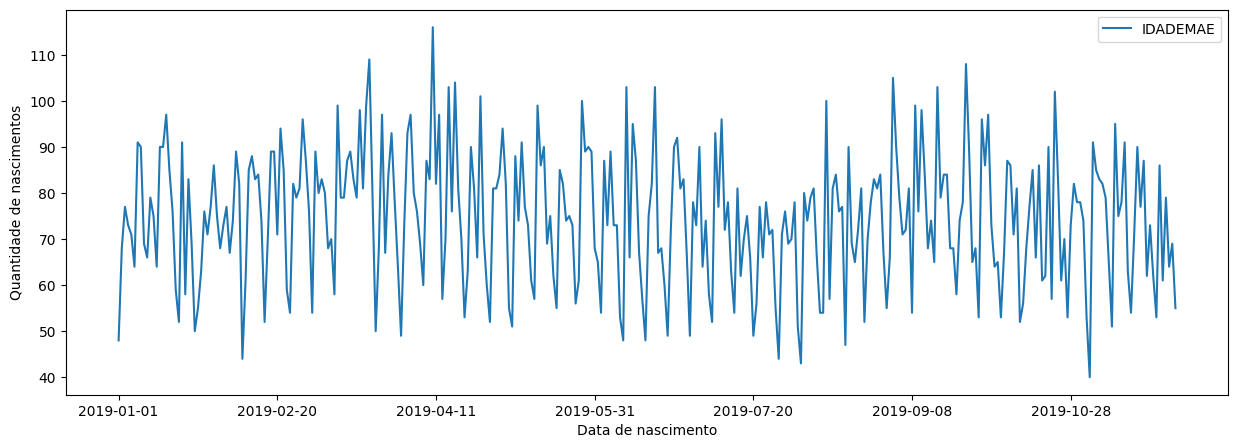

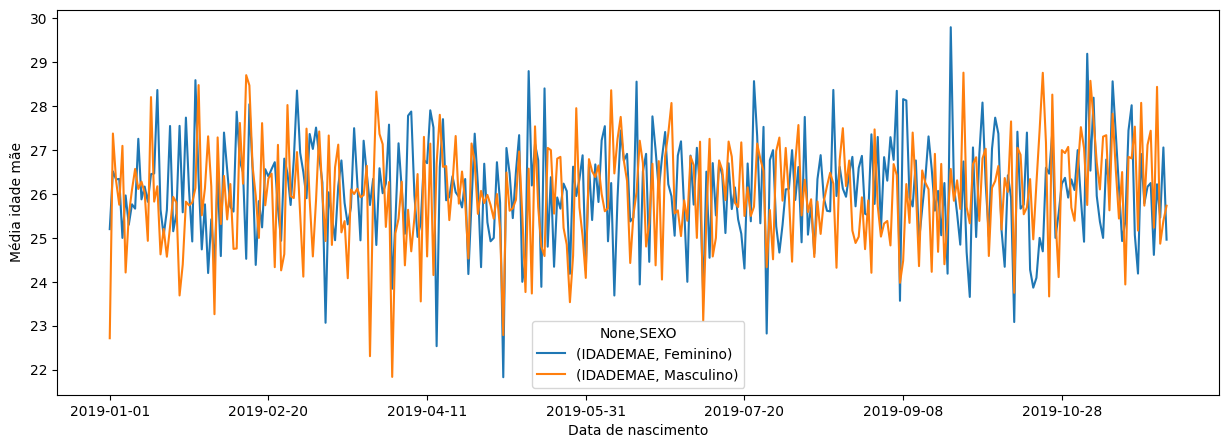

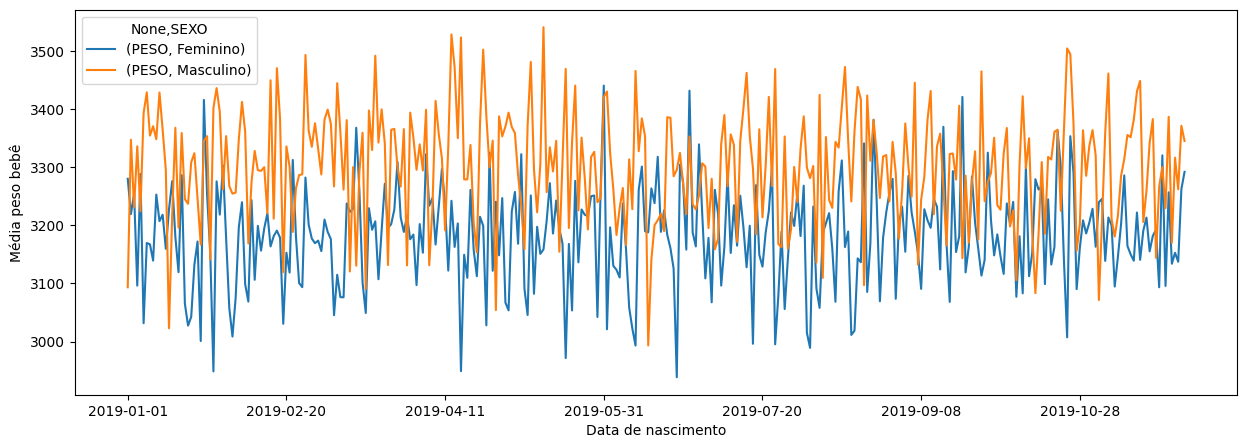

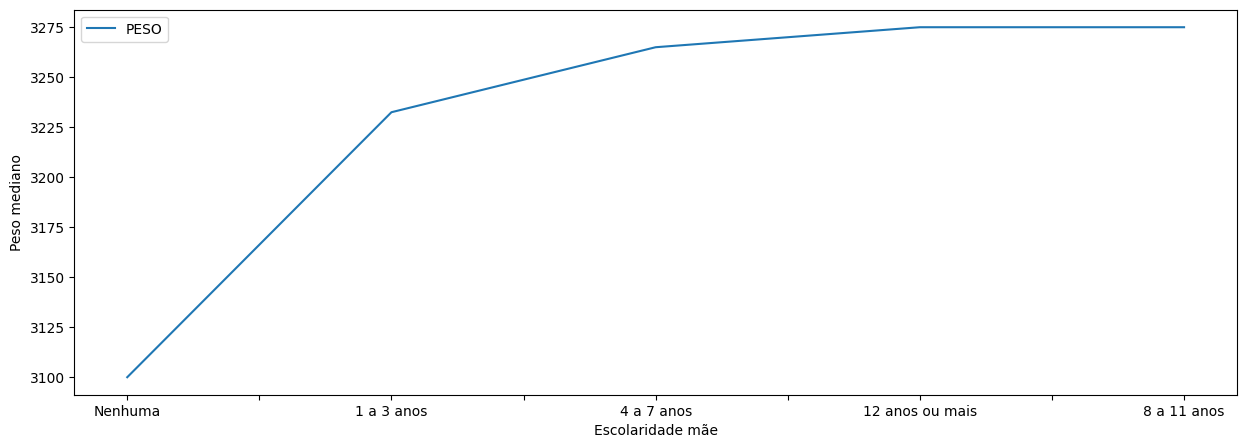

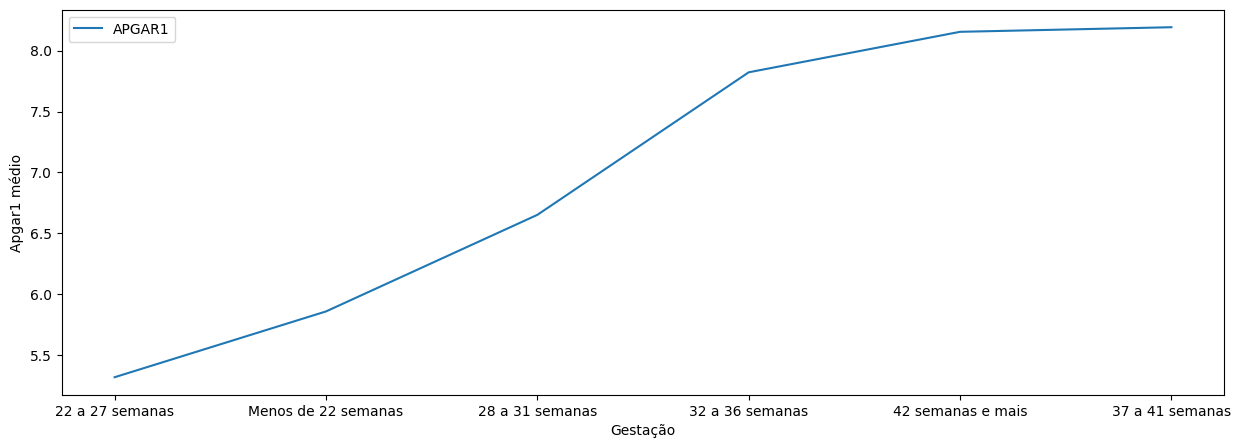

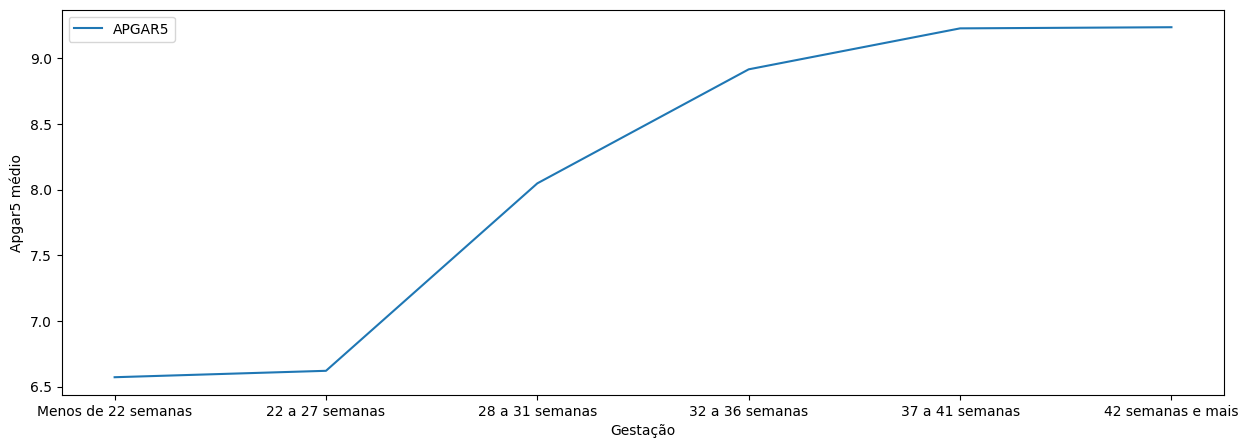

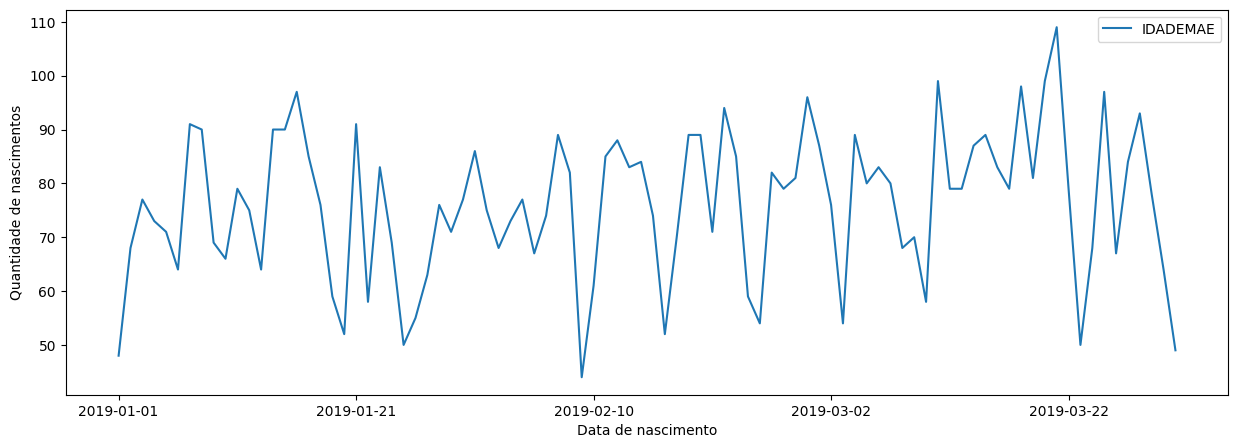

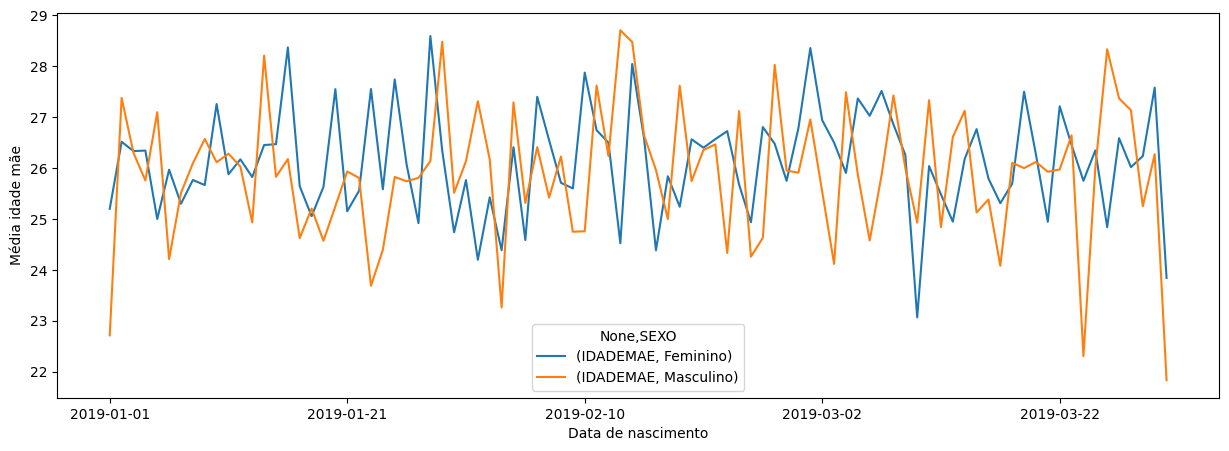

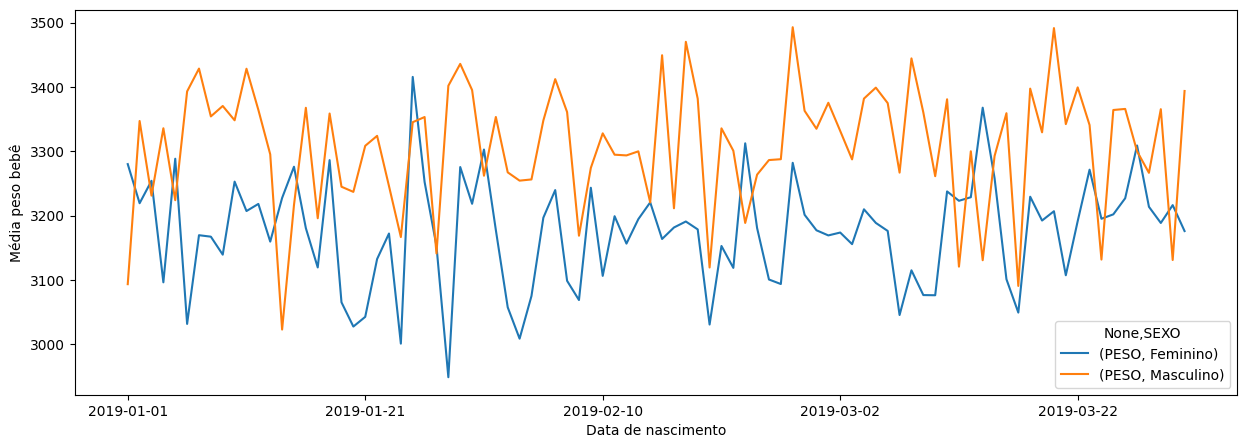

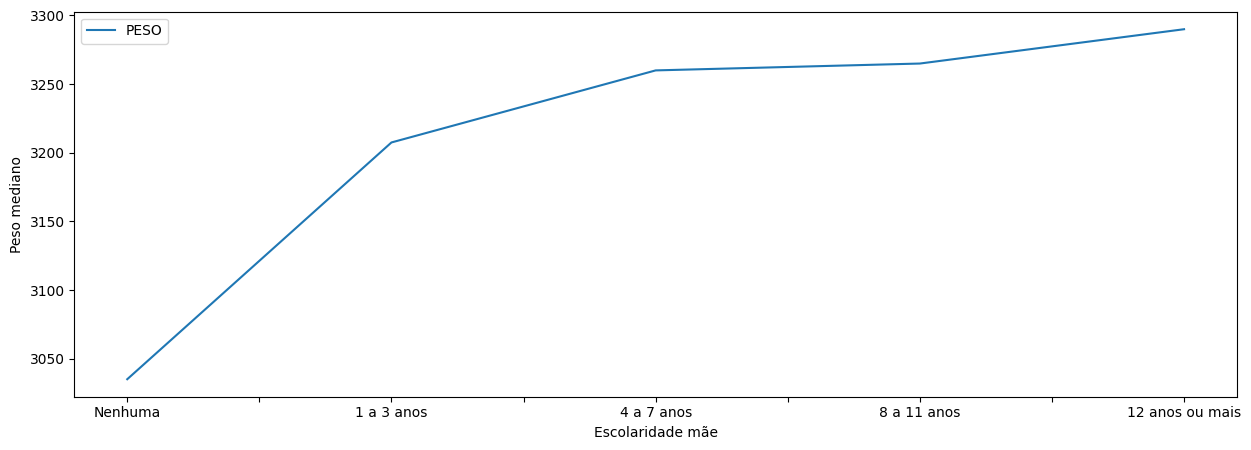

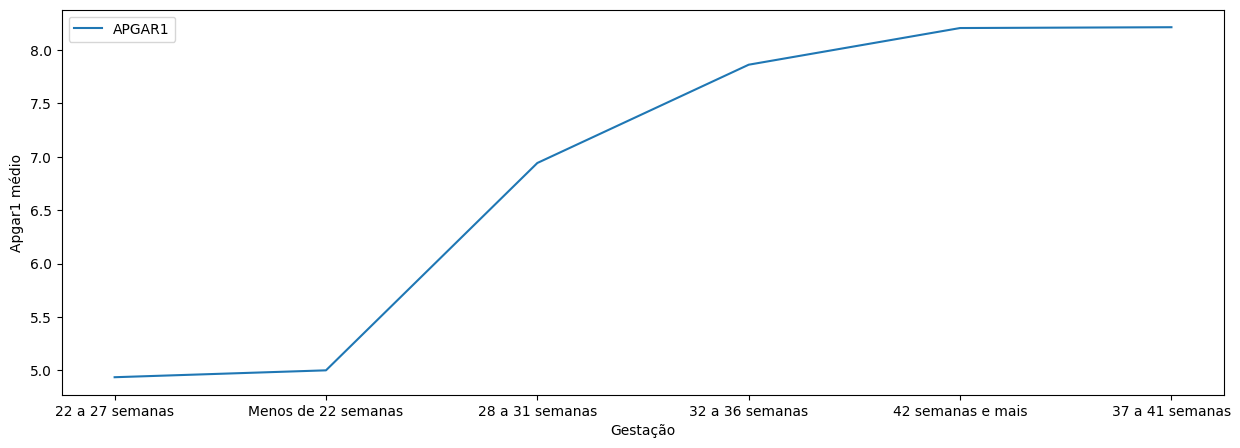

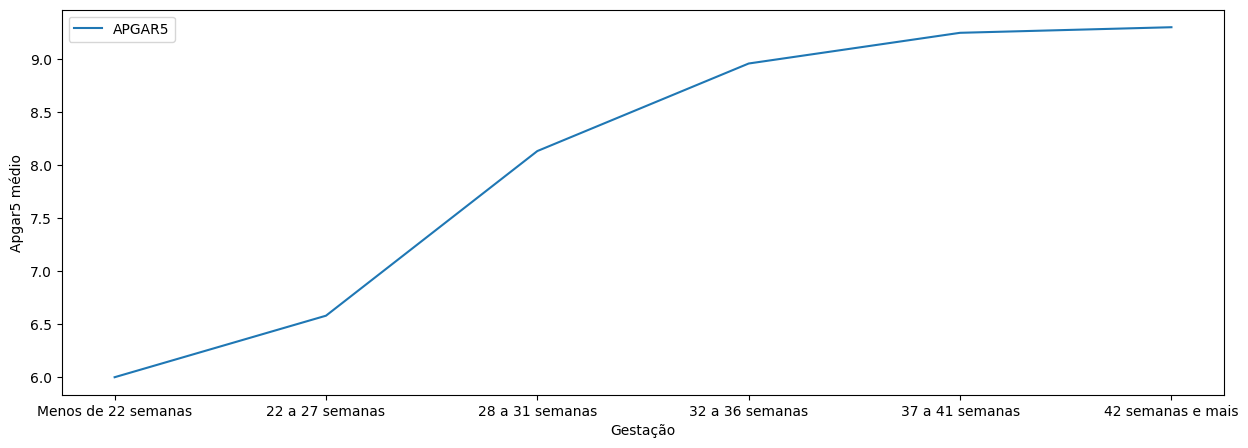

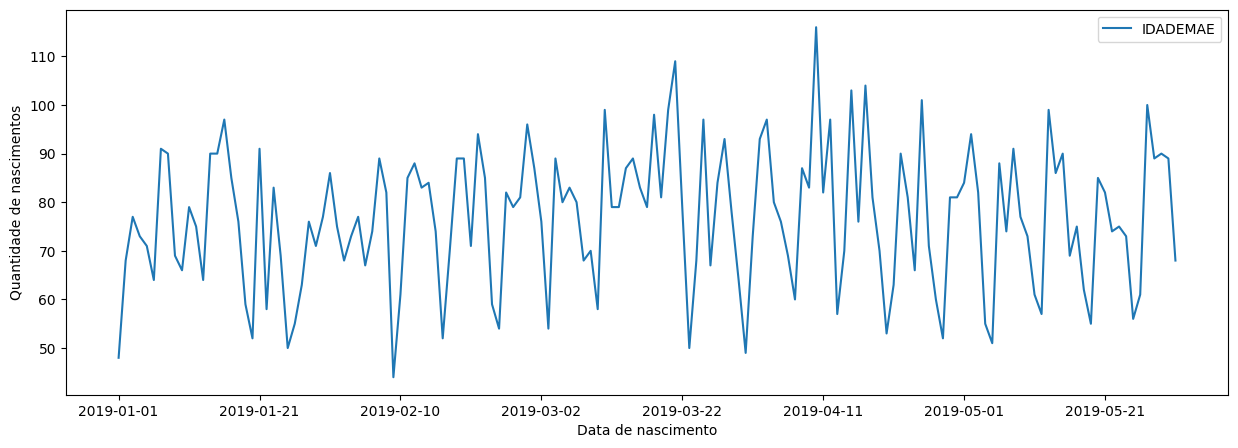

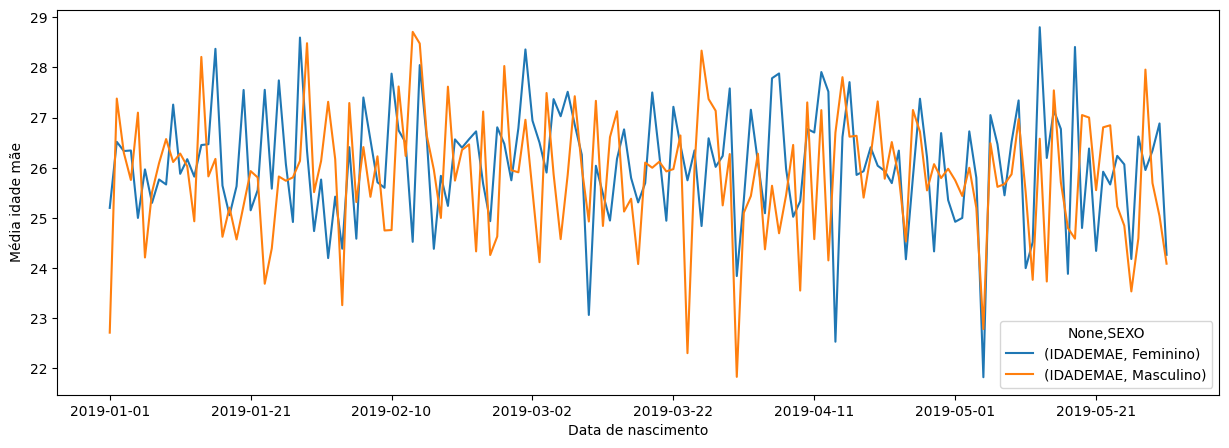

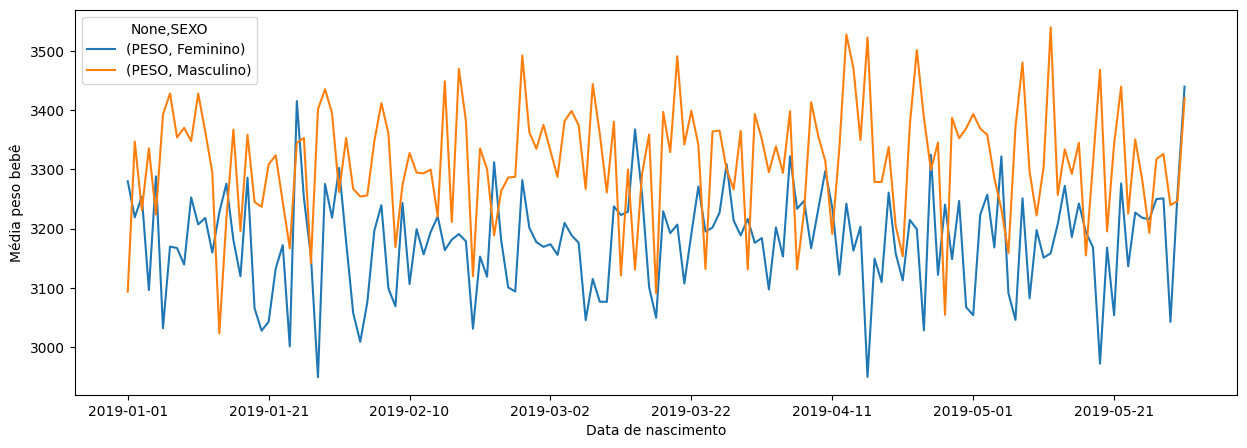

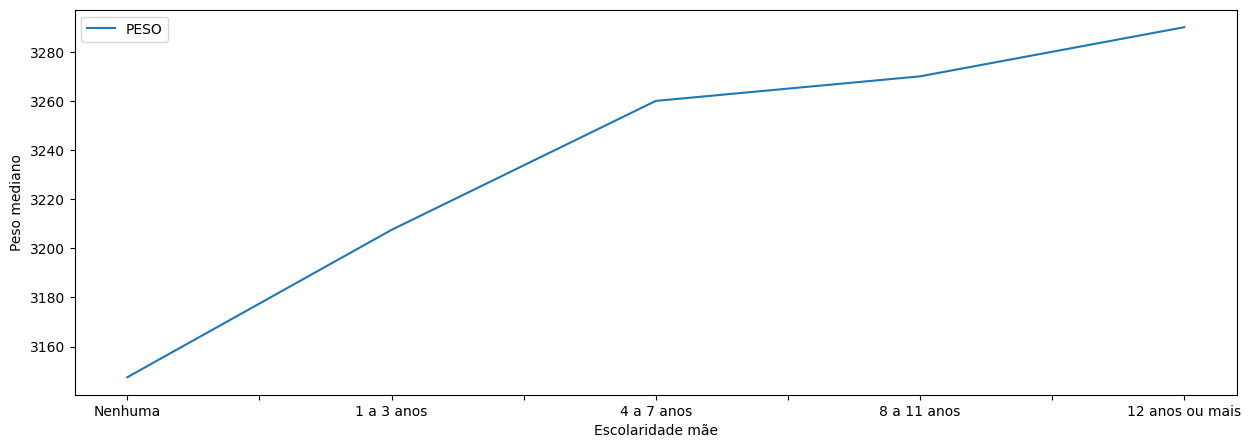

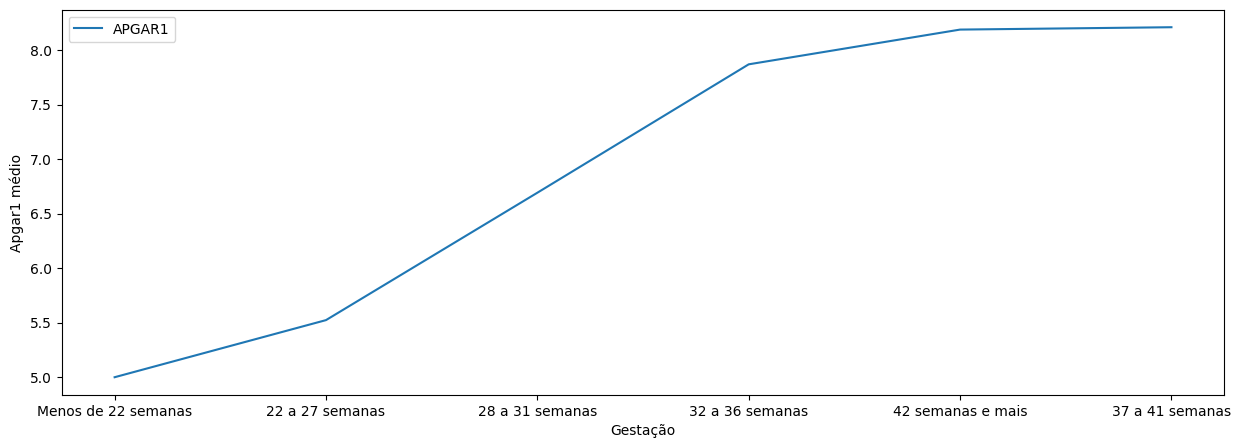

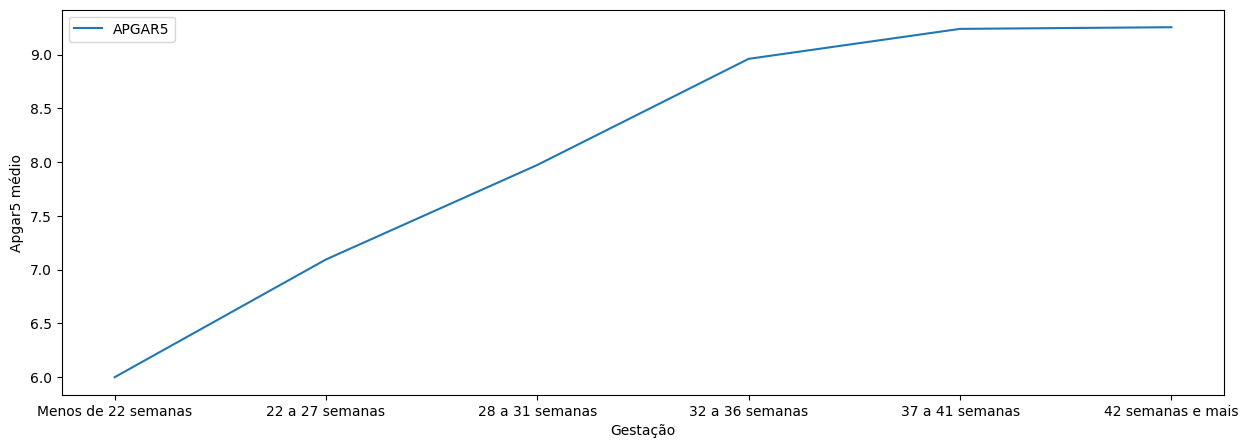

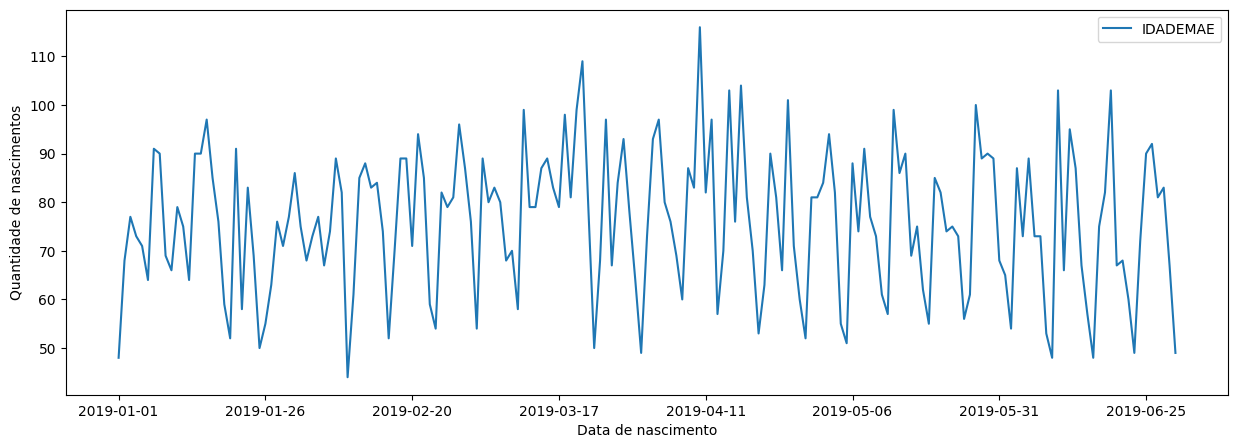

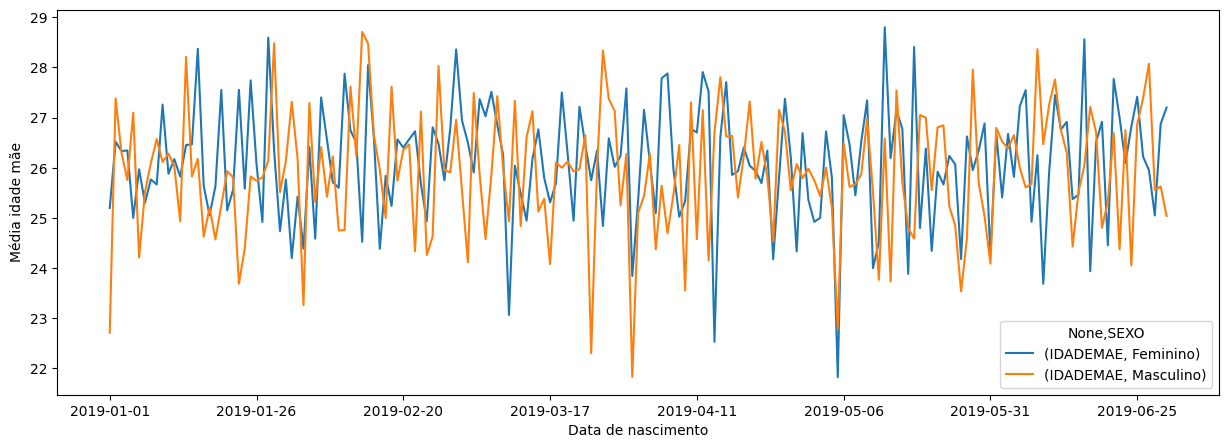

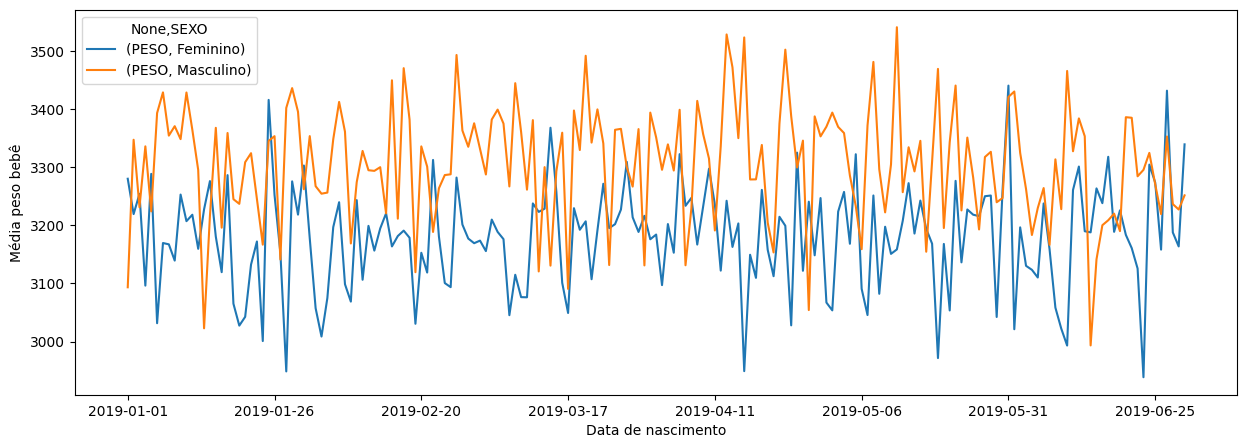

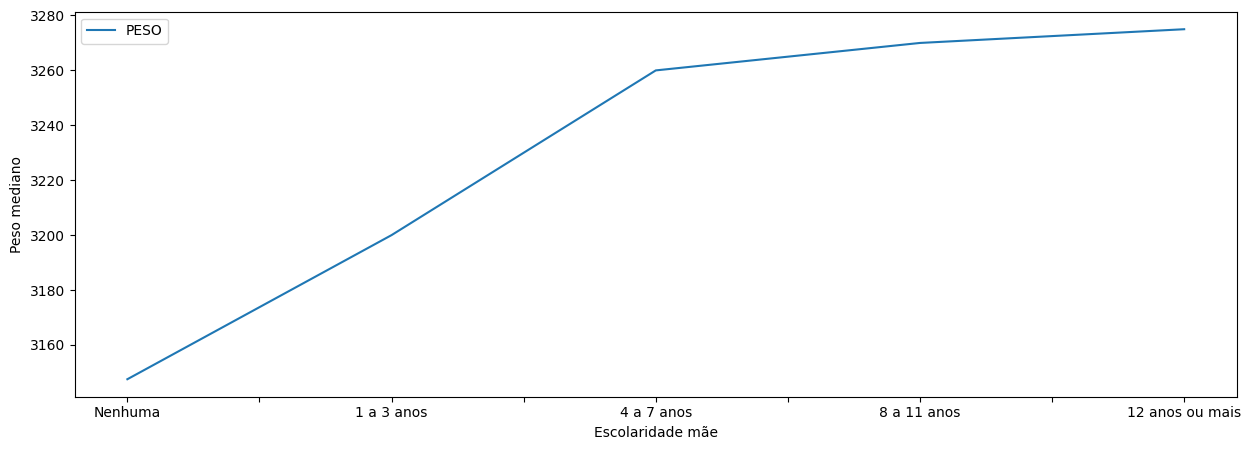

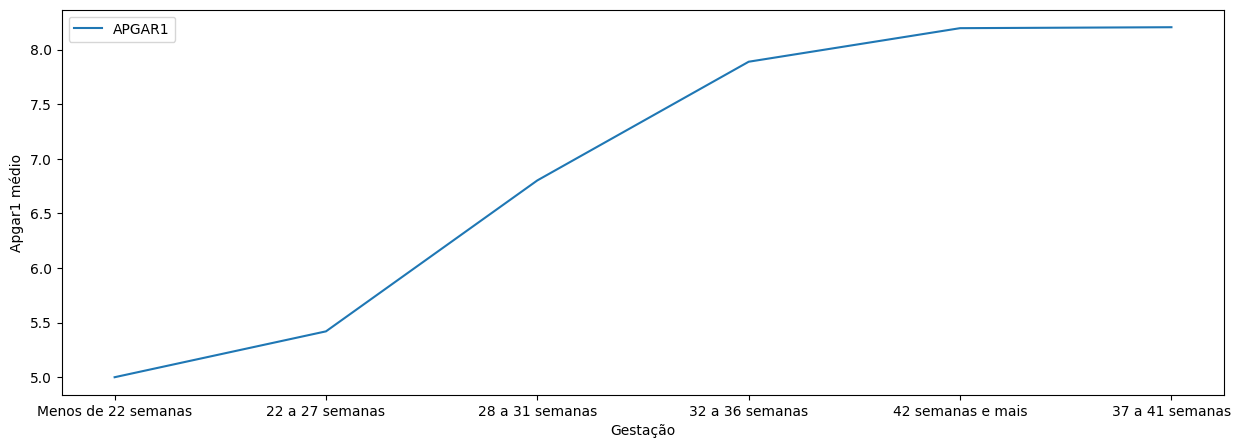

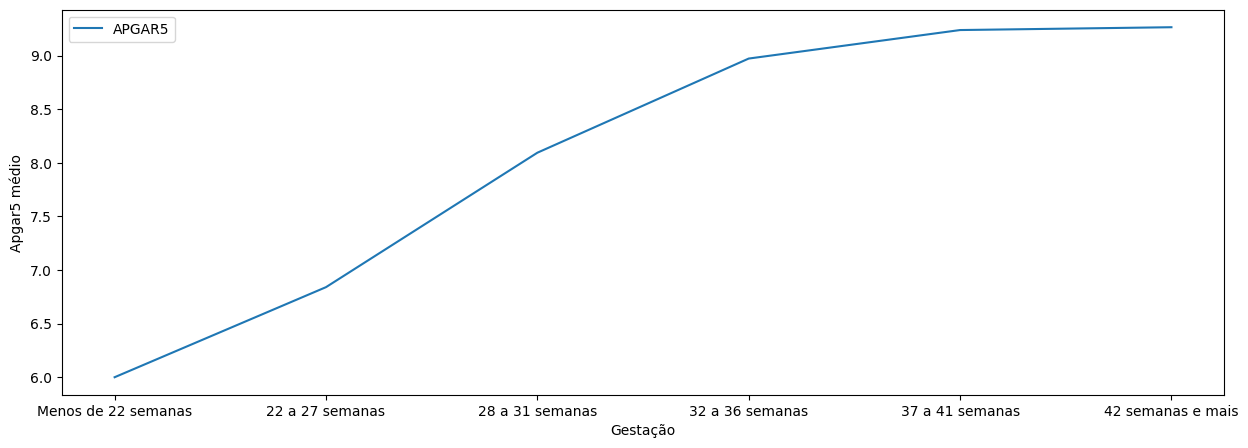

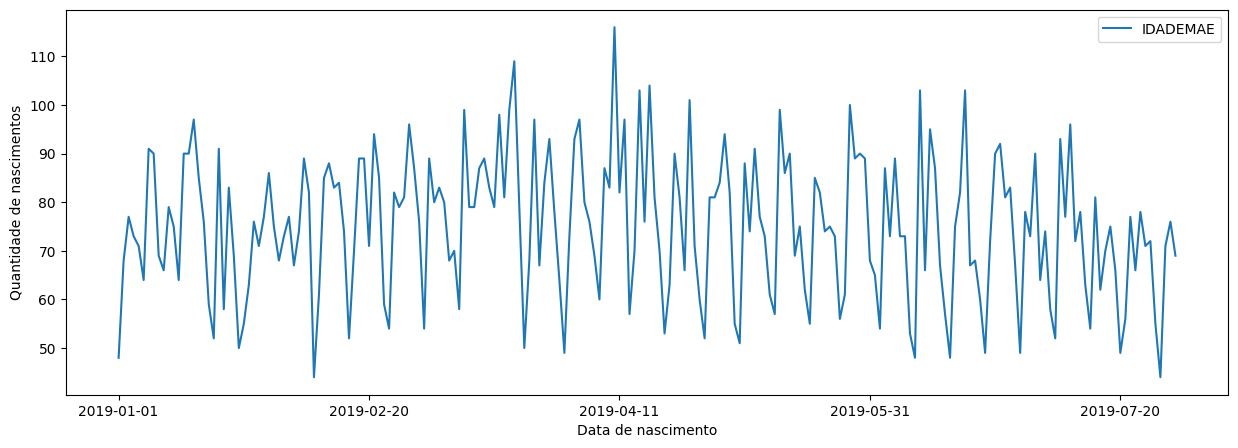

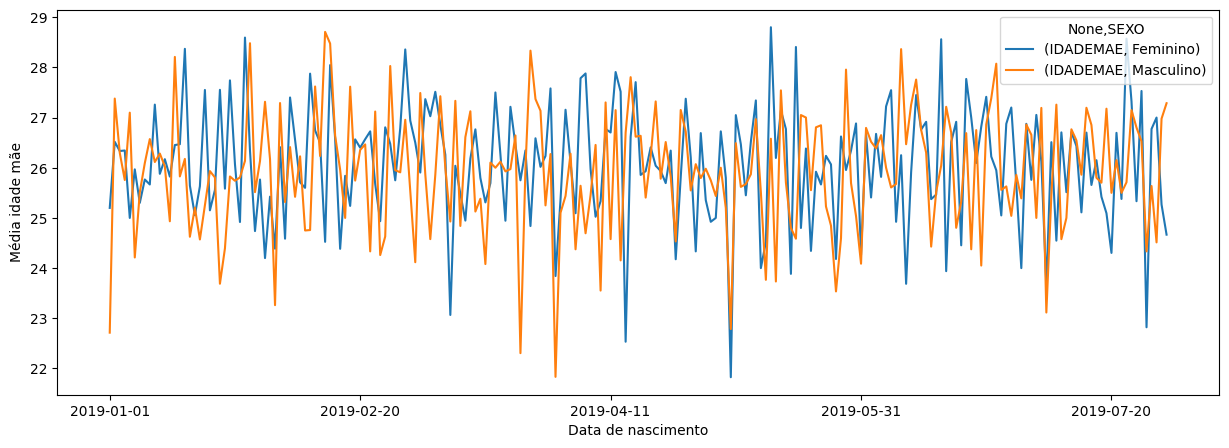

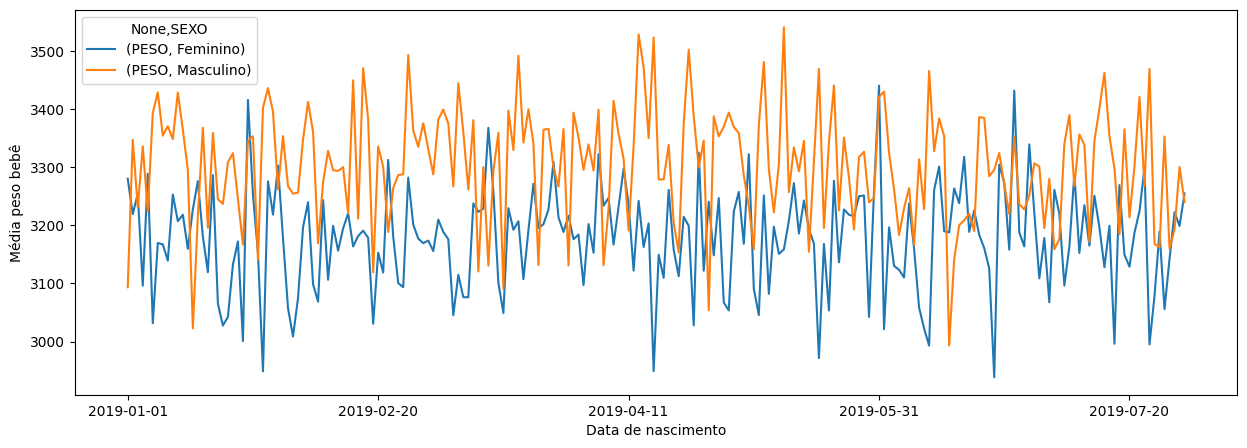

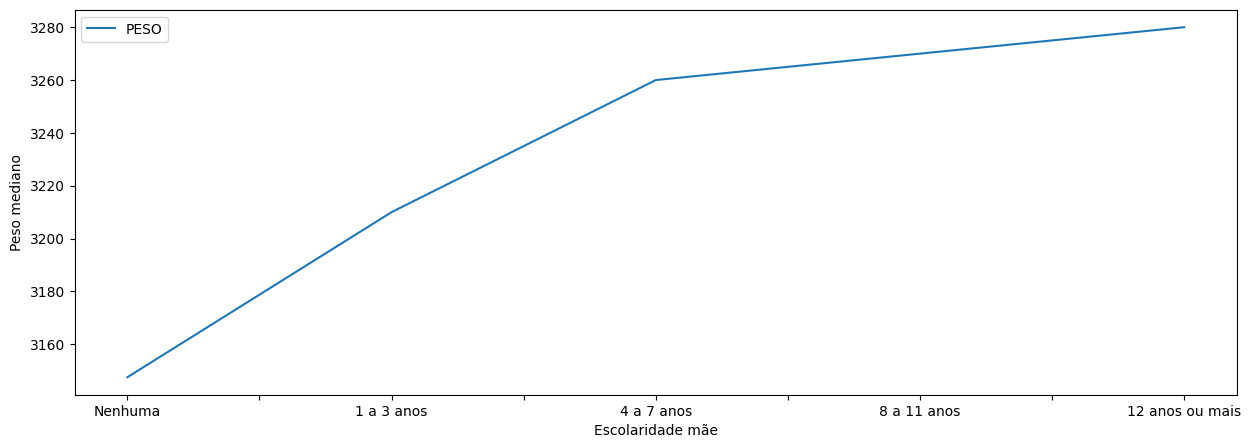

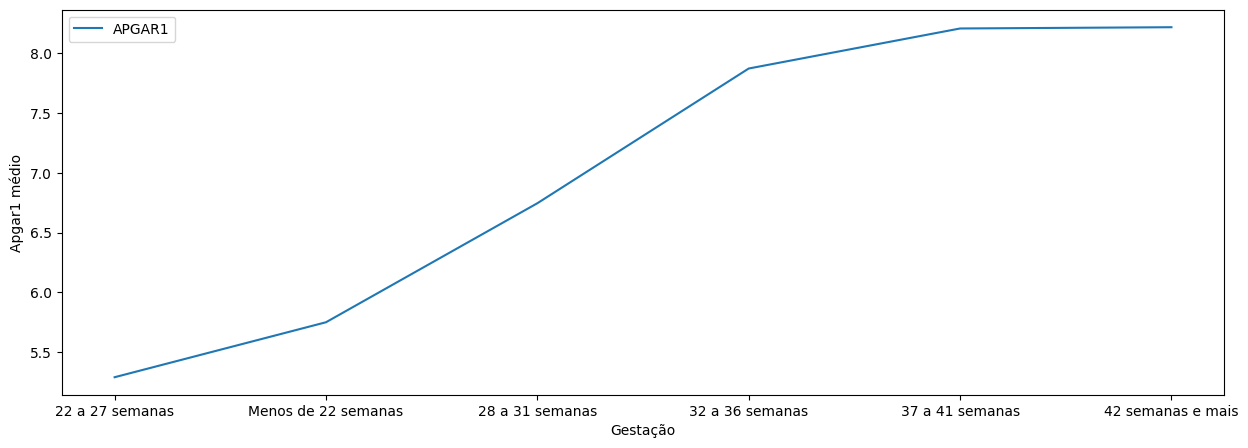

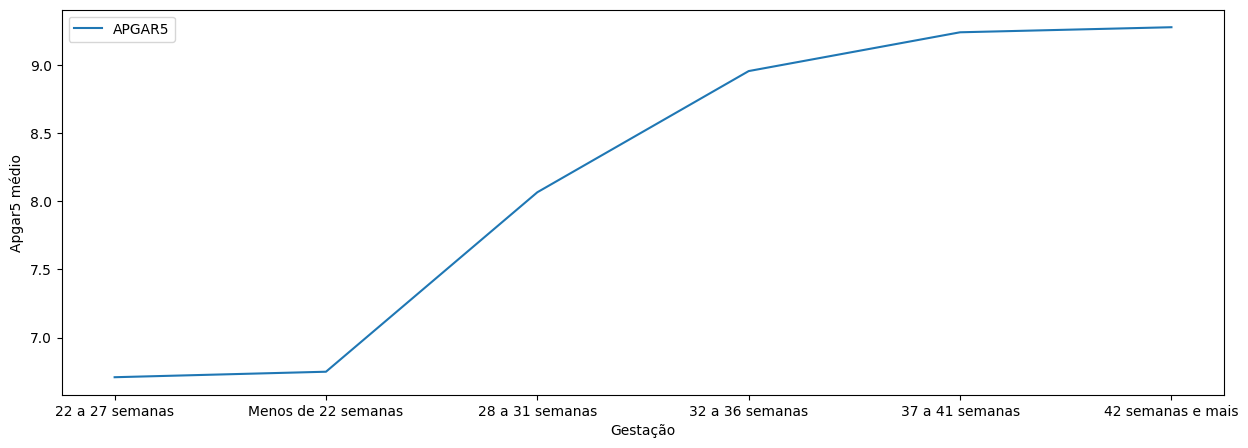

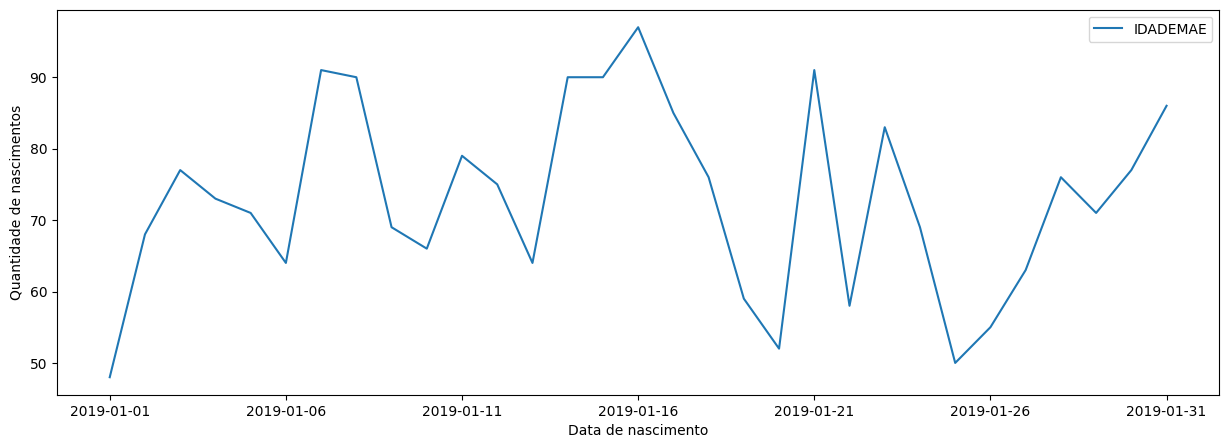

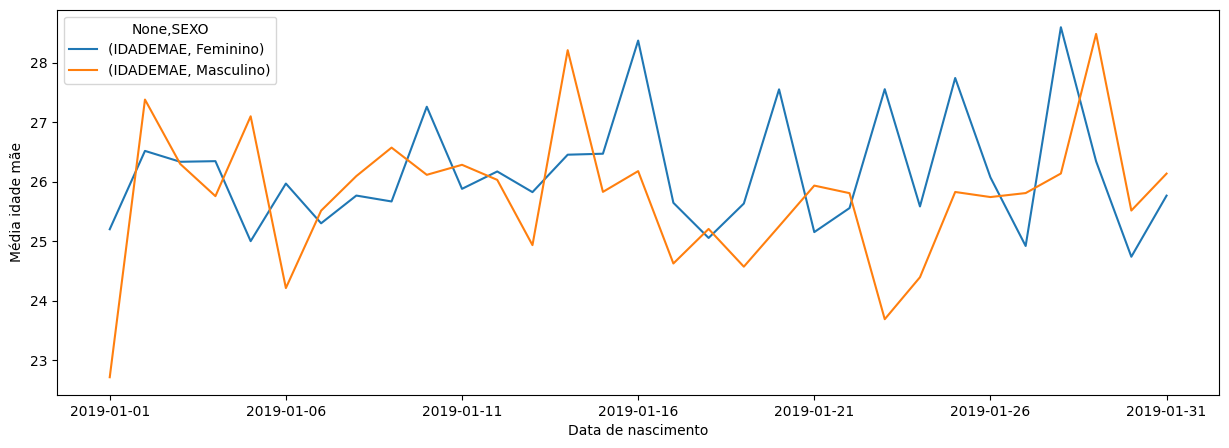

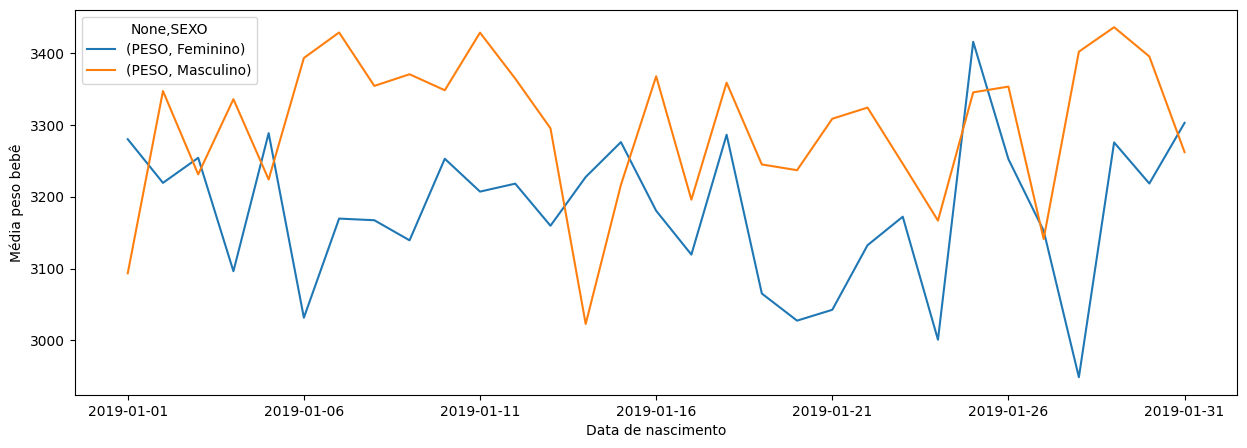

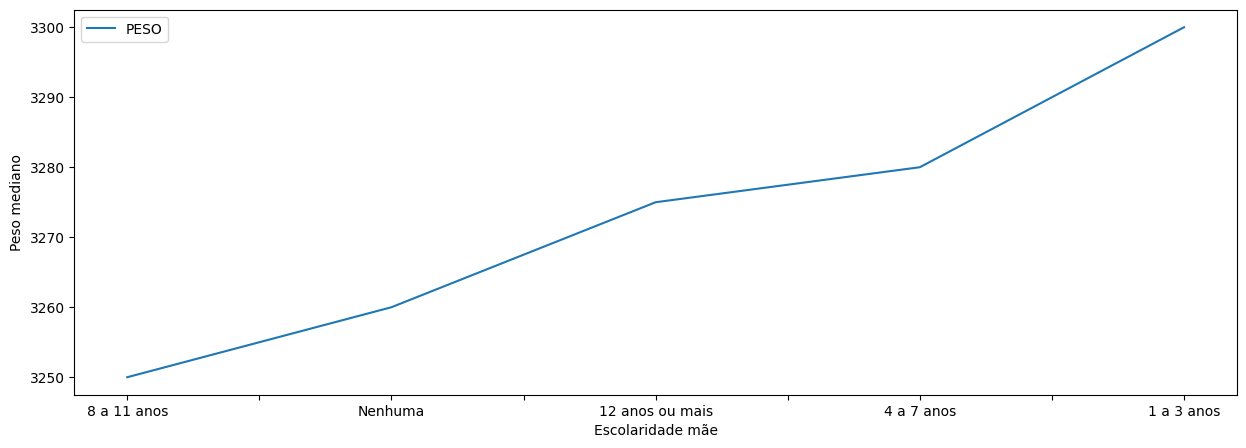

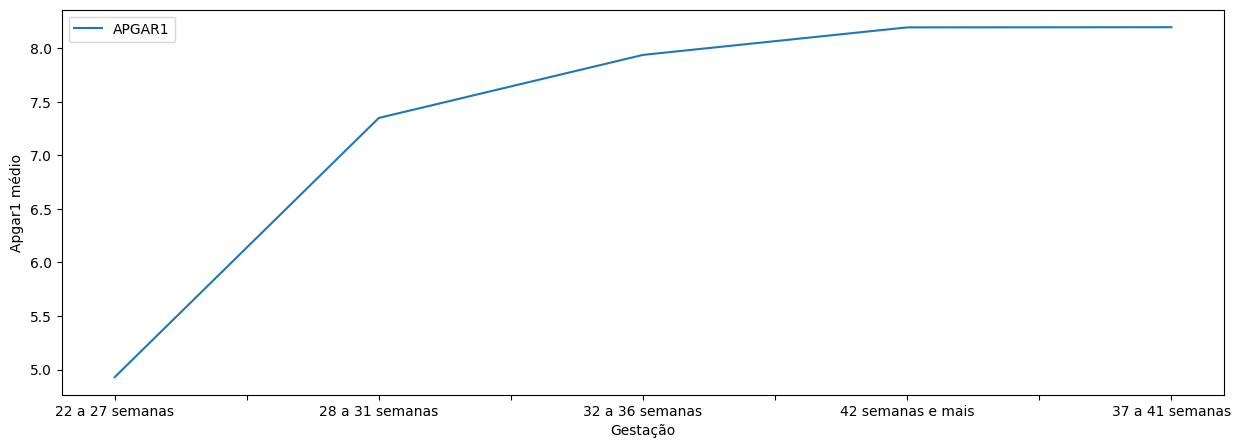

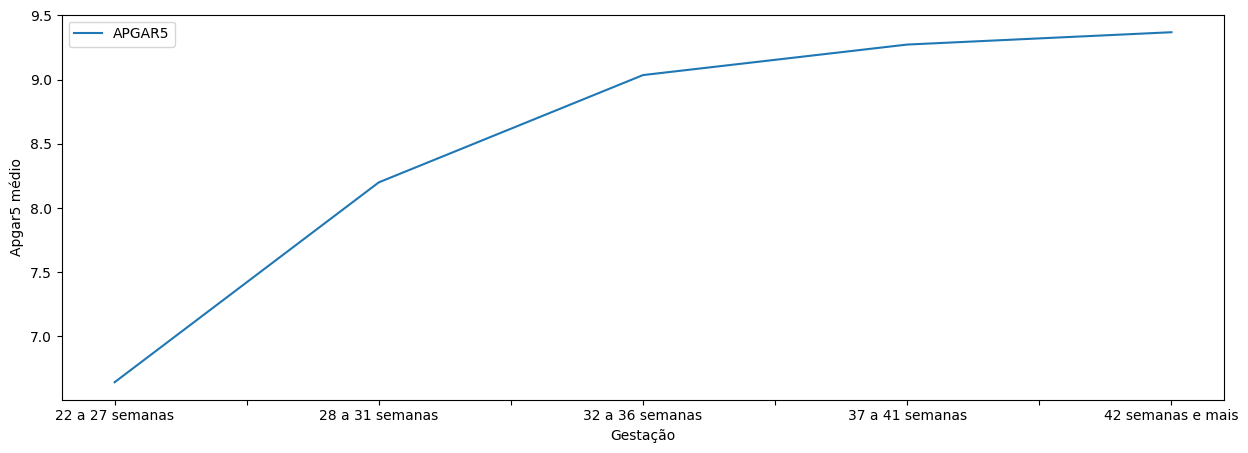

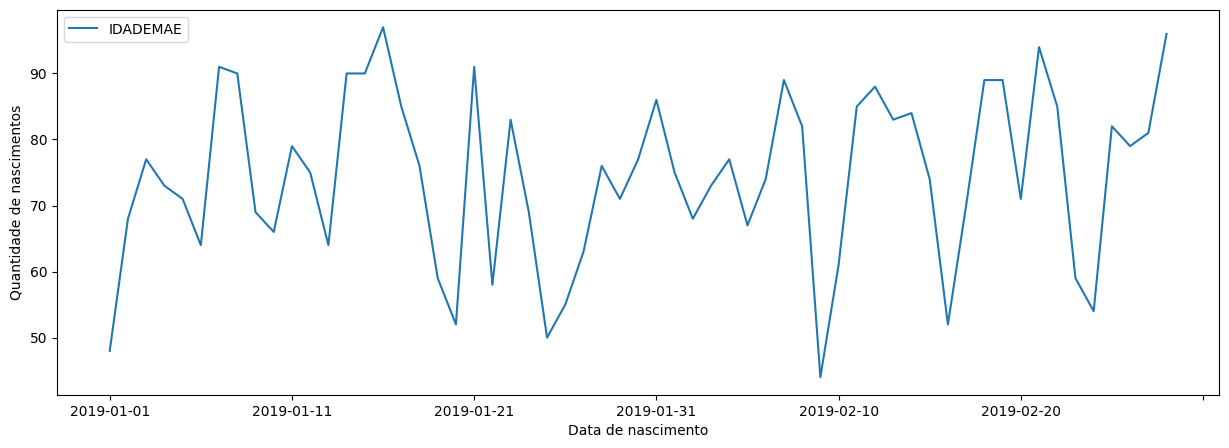

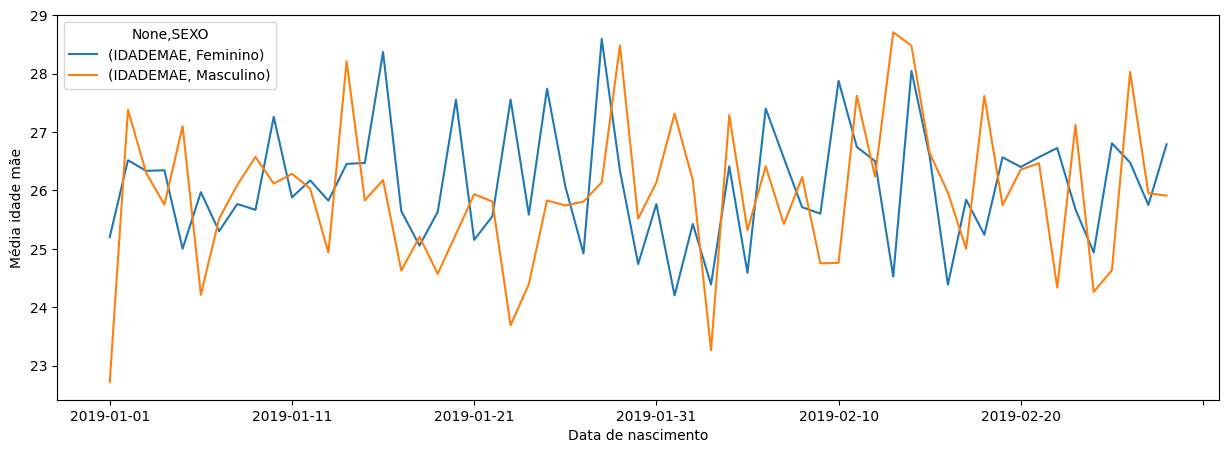

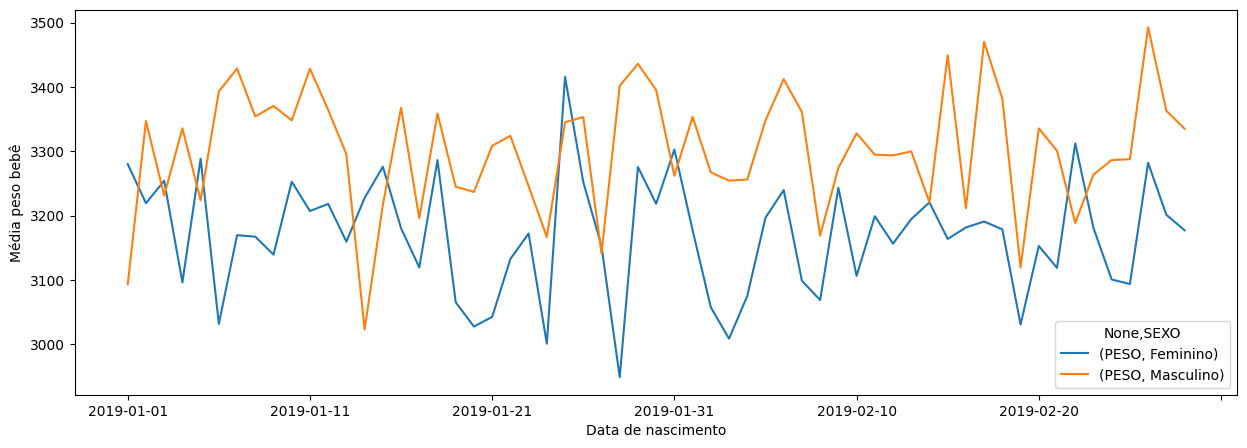

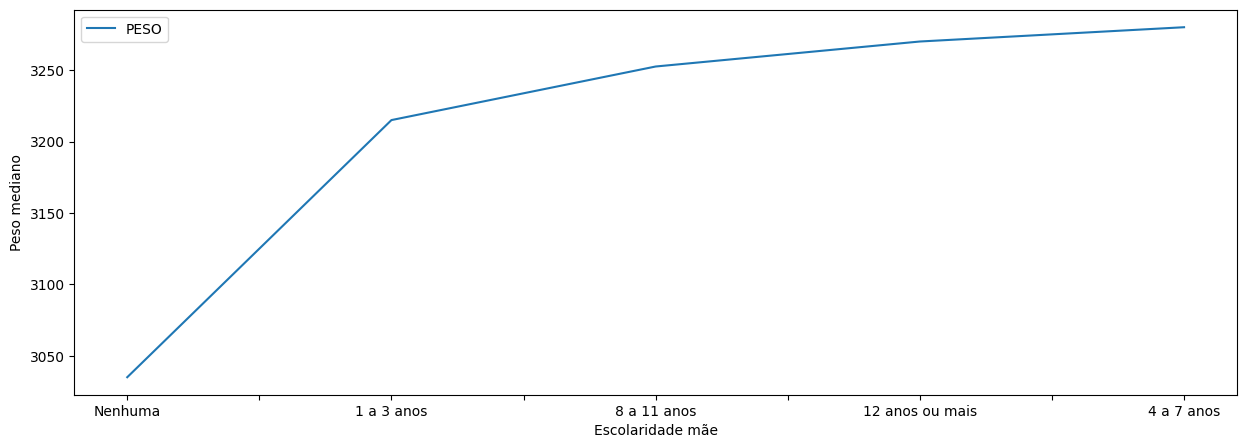

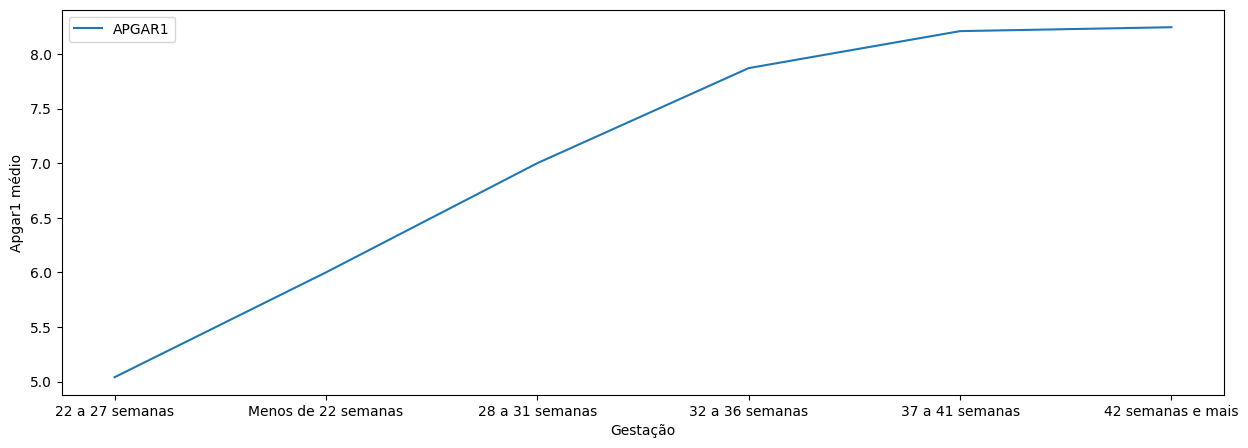

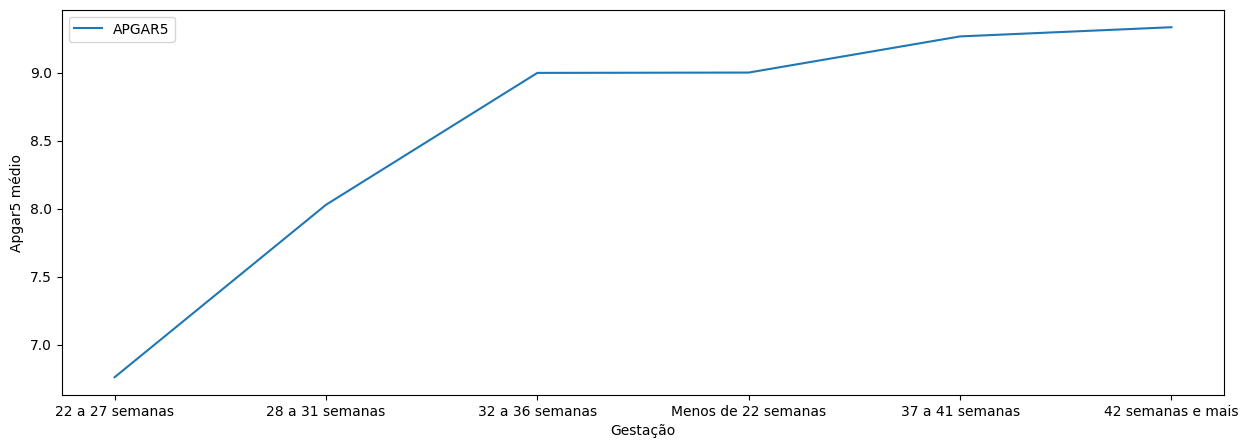

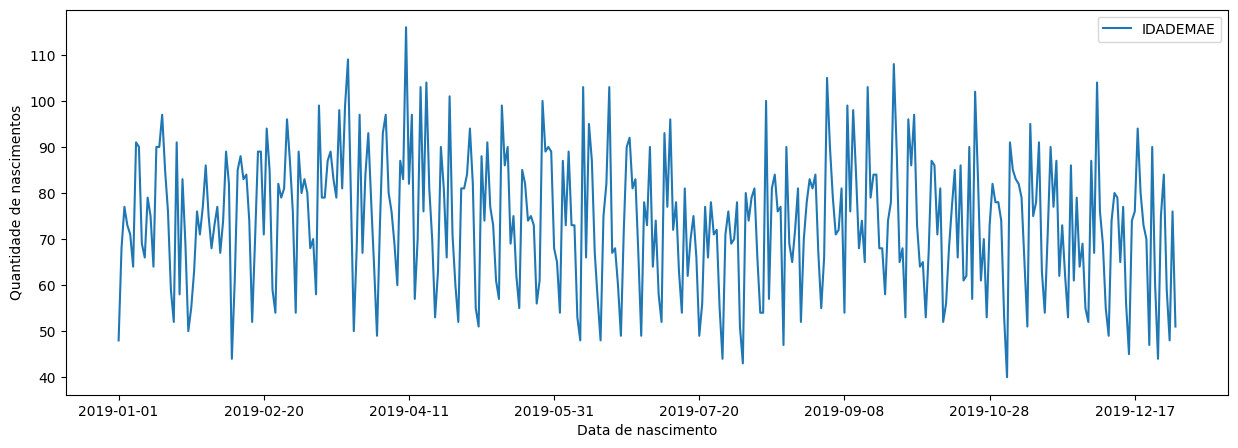

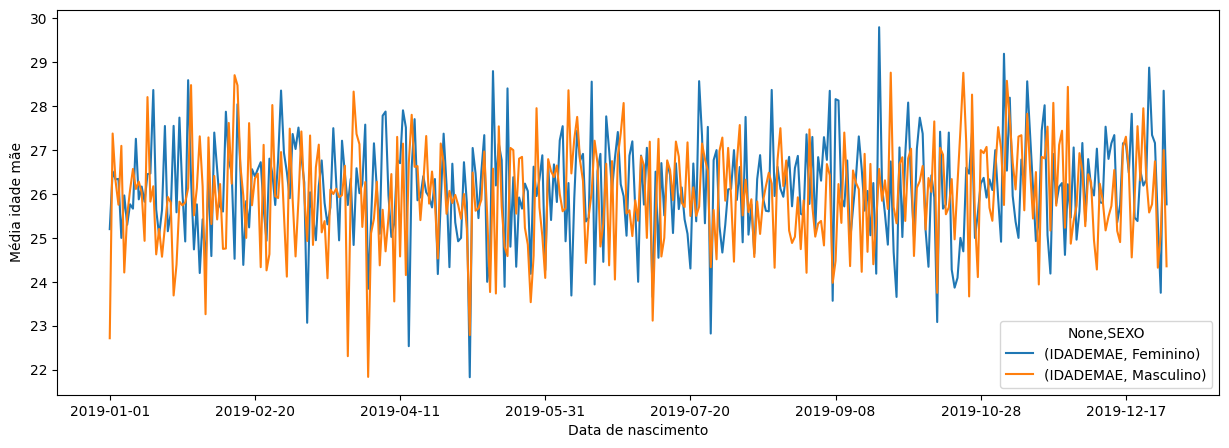

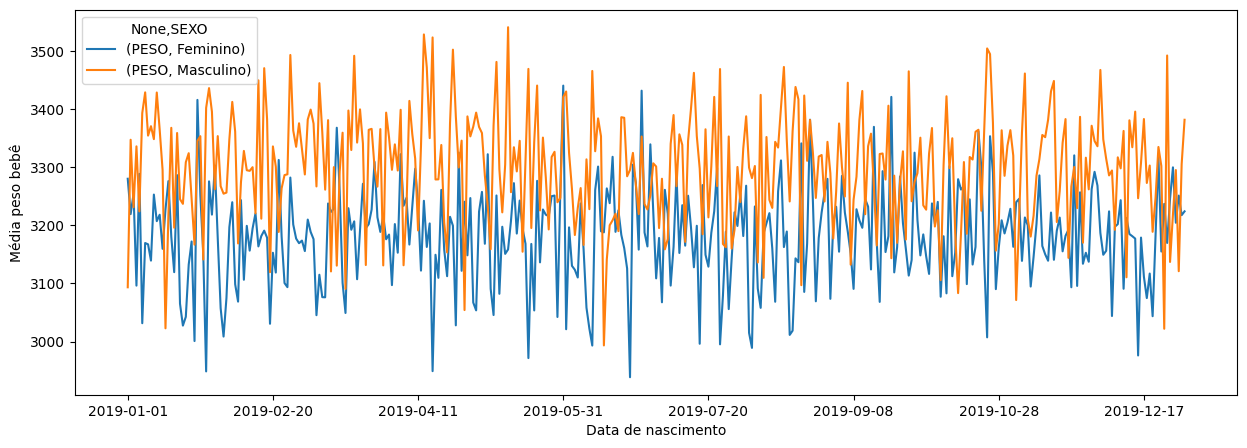

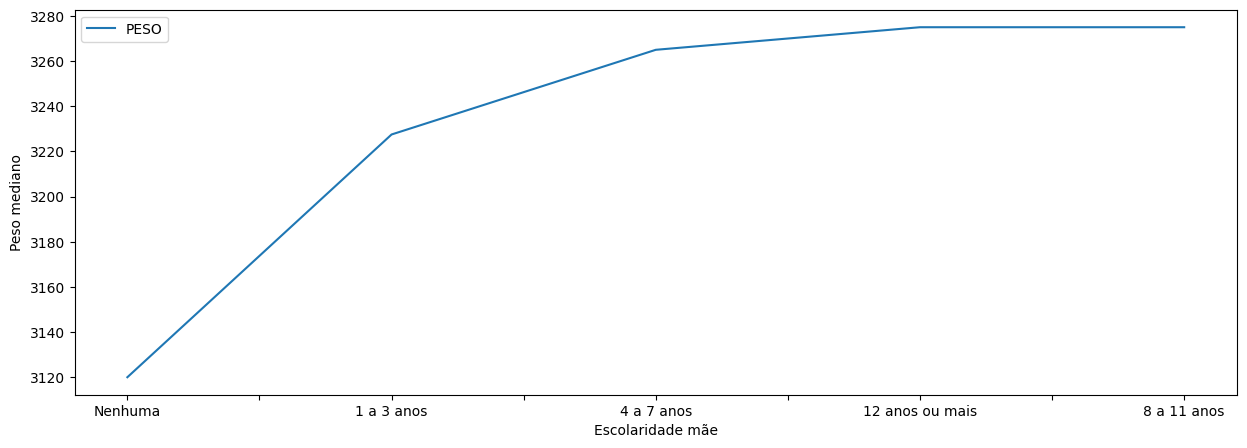

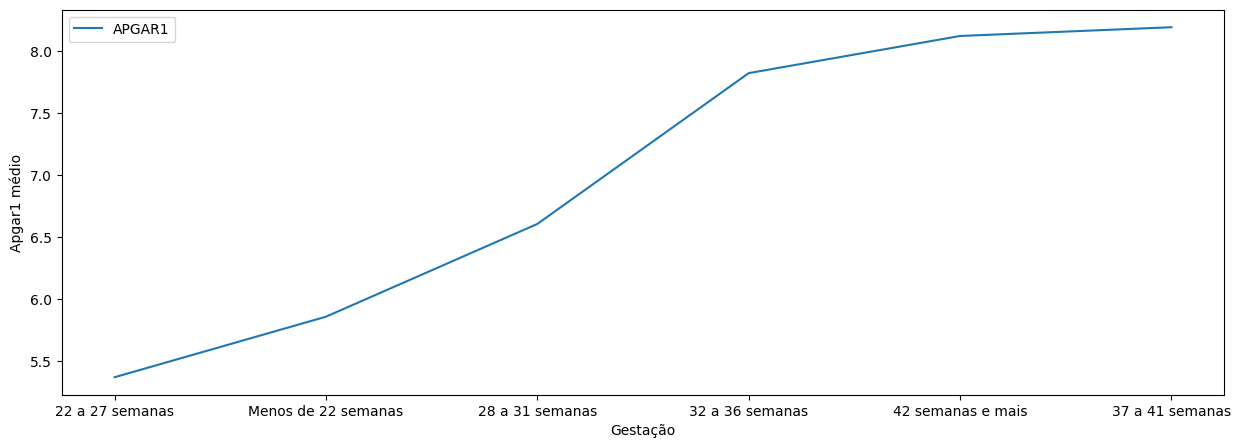

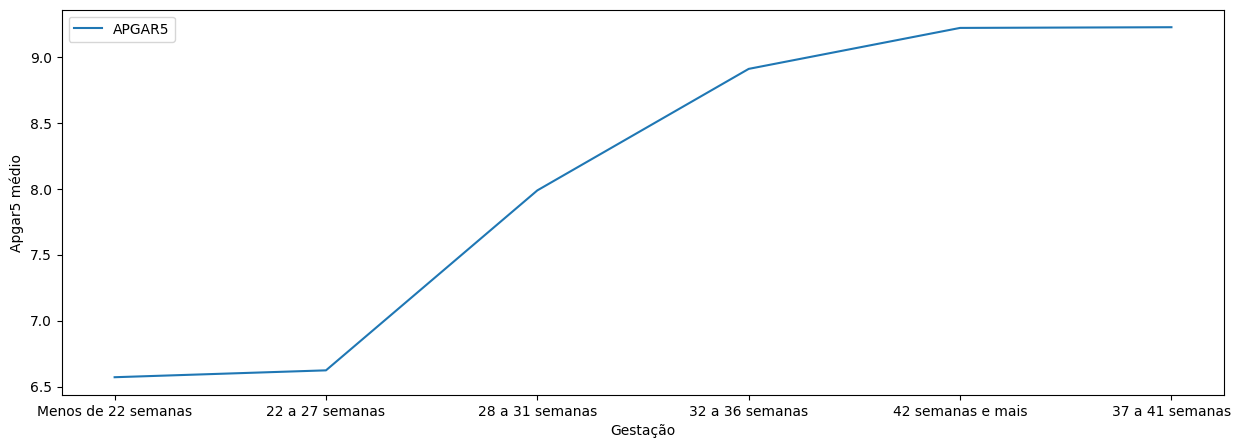

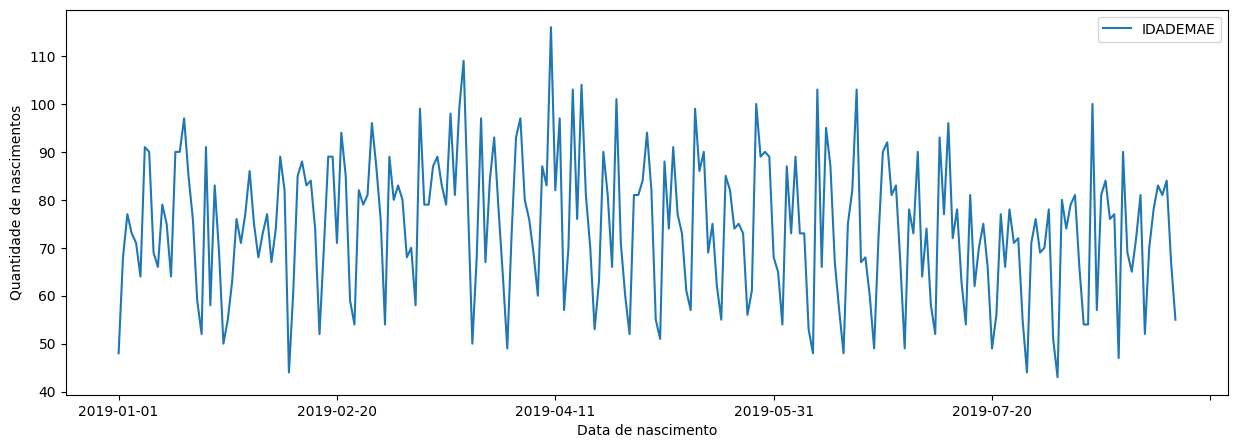

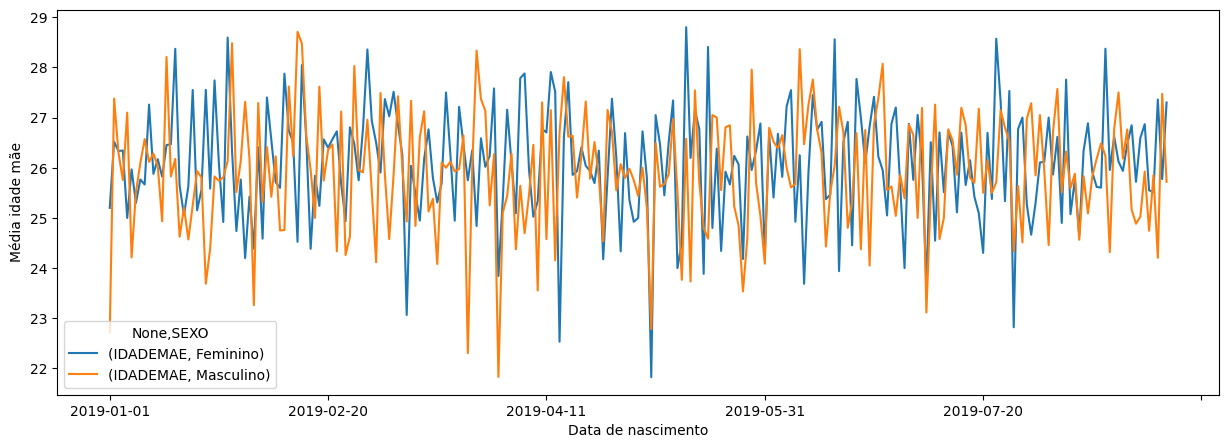

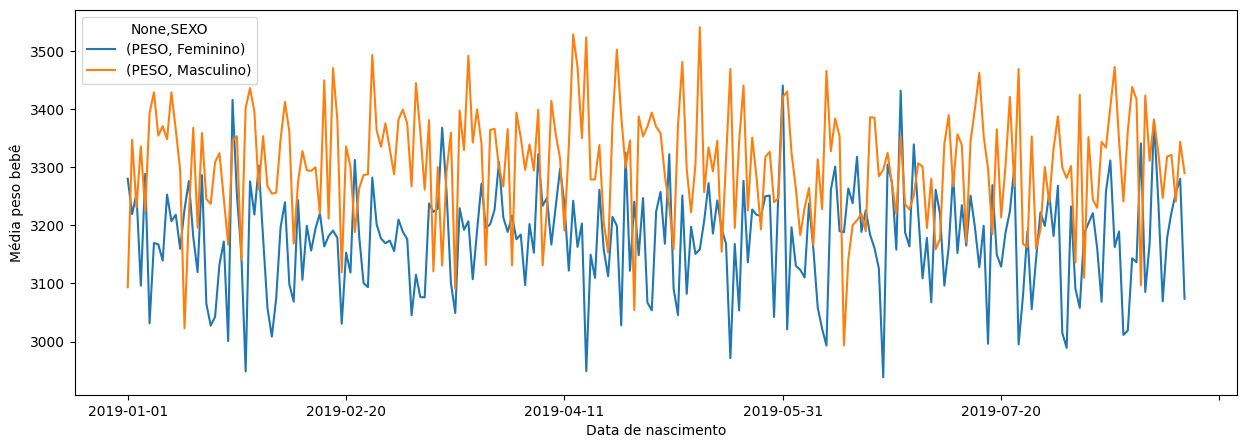

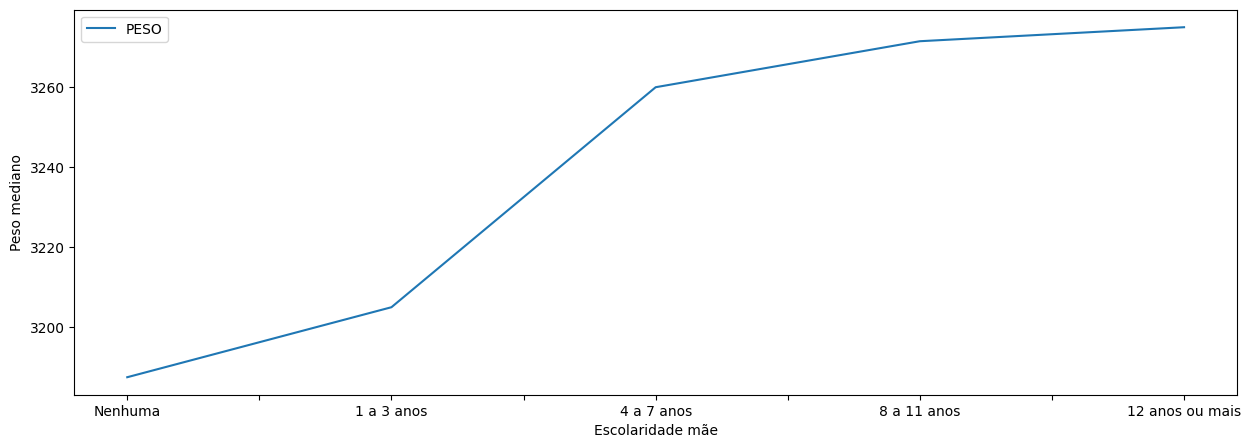

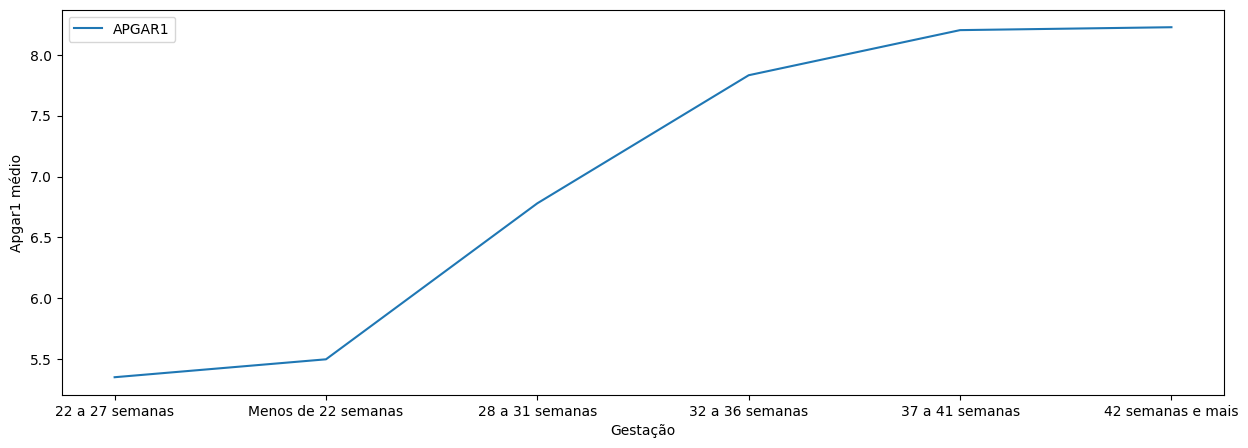

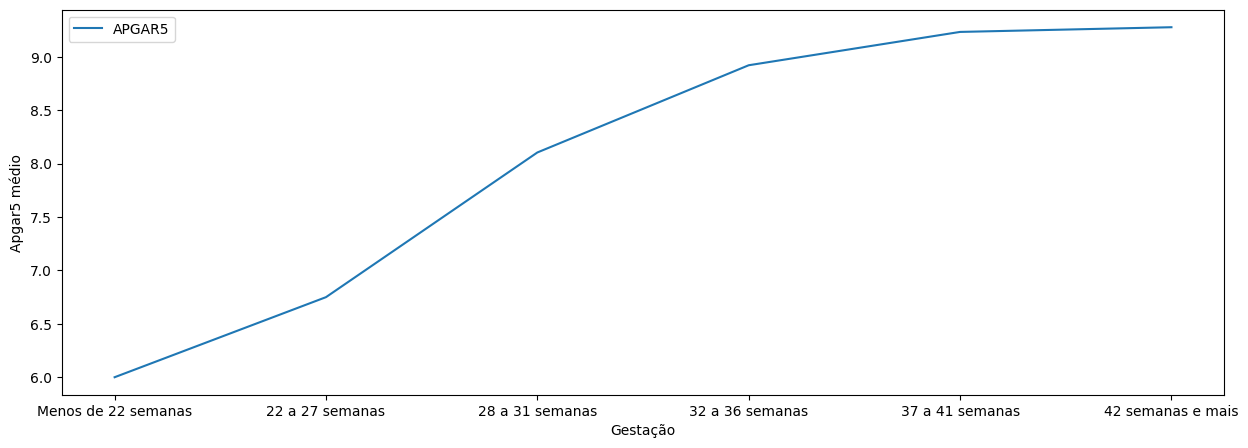

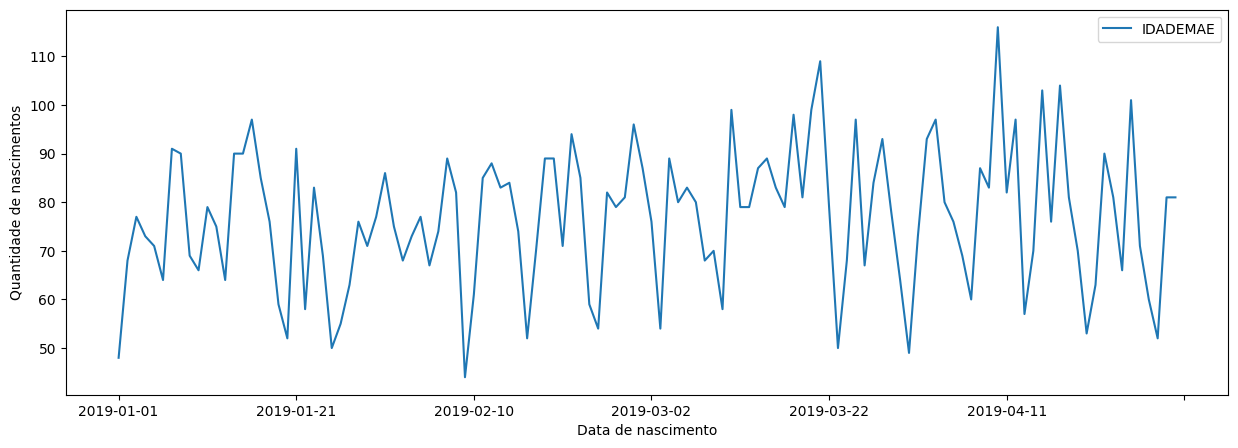

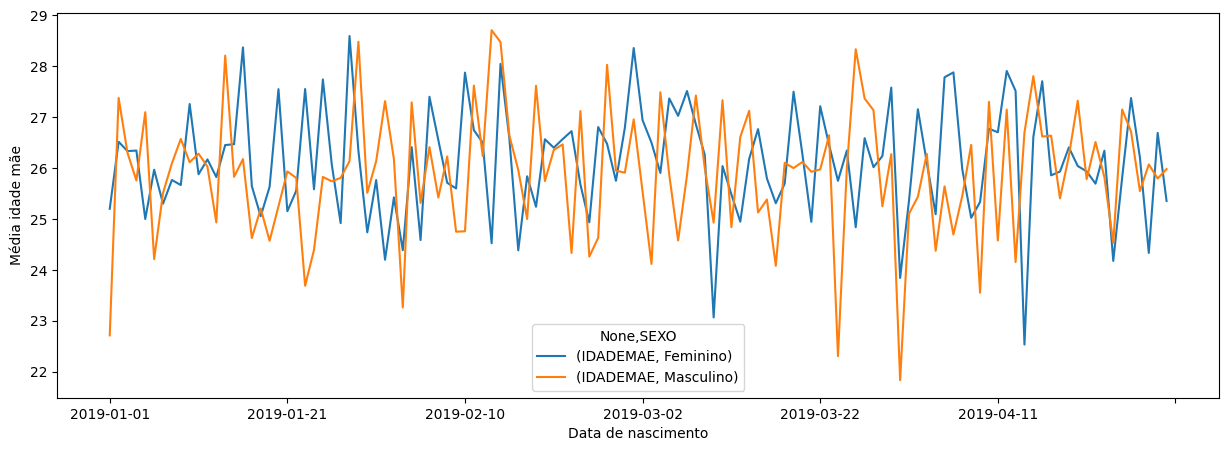

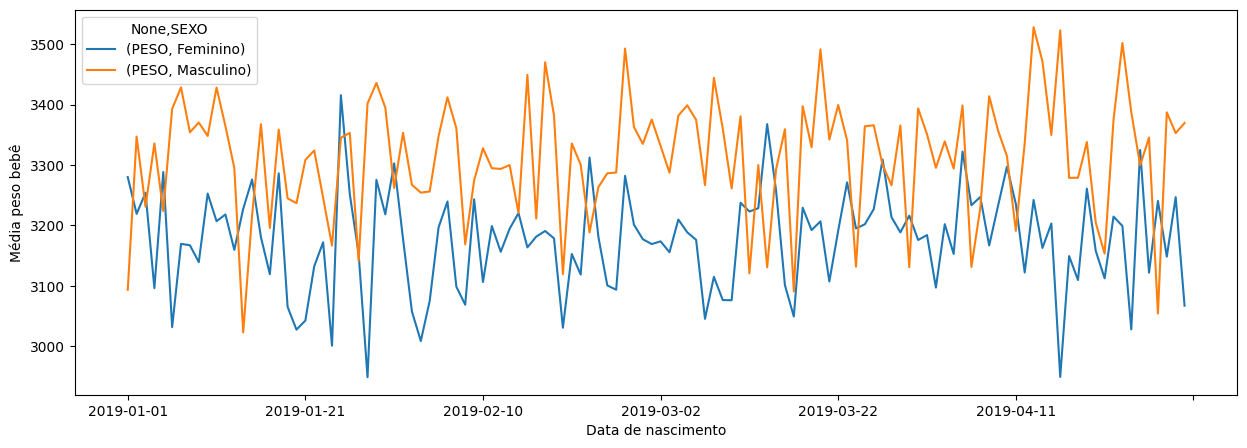

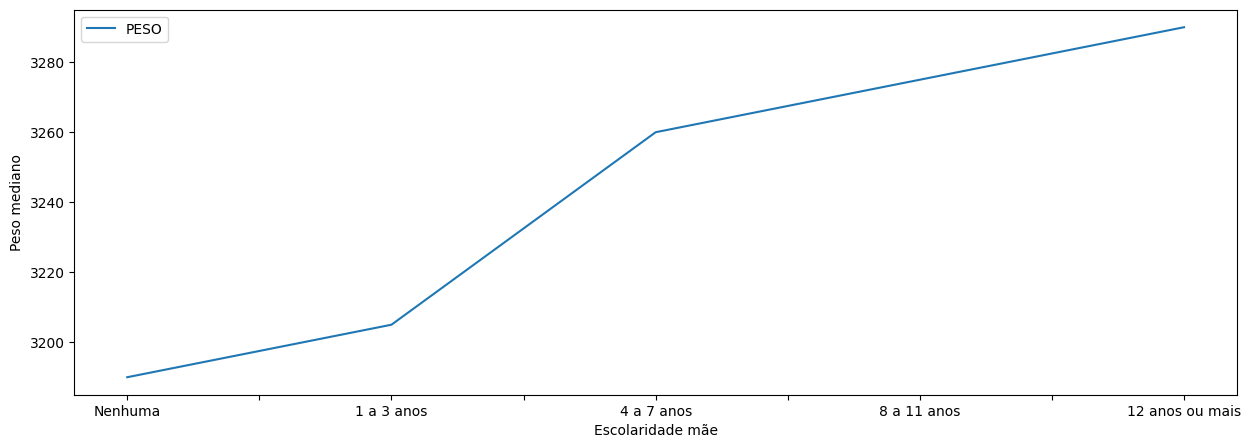

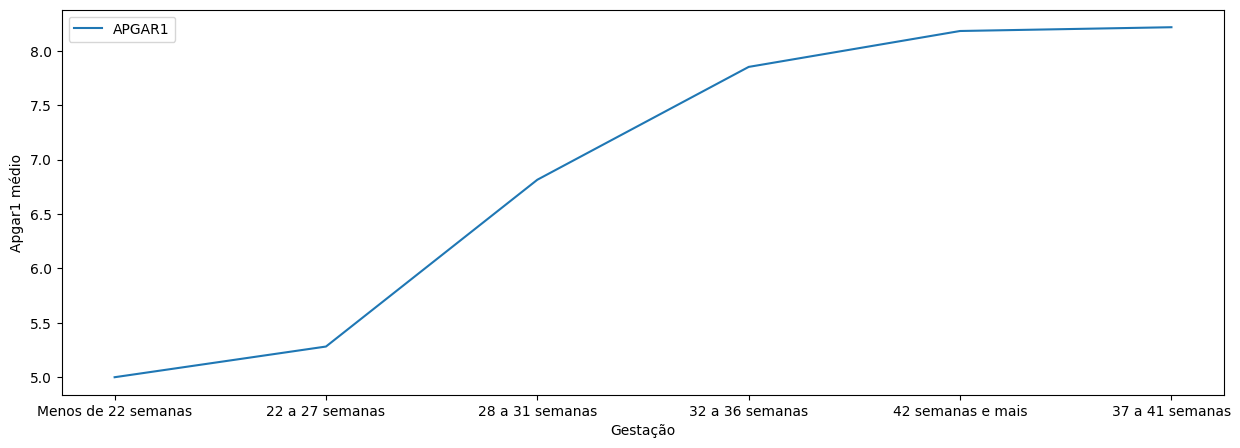

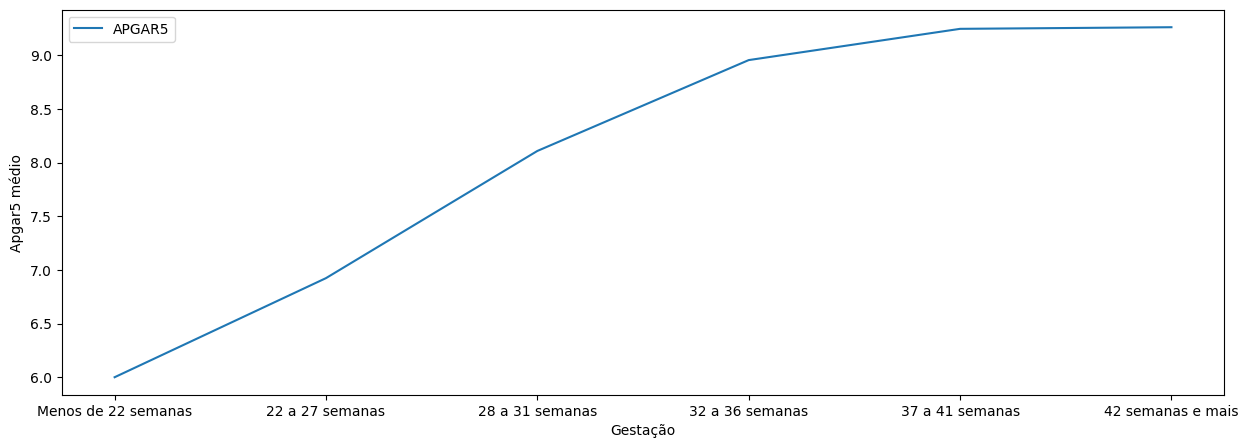

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

file_list = [
    'OUT', 'NOV', 'MAR', 'MAI', 'JUN', 'JUL', 'JAN', 'FEV', 'DEZ', 'AGO', 'ABR'
]

for file_arg in file_list:
    sinasc = pd.read_csv(f'/Users/macbookpro/Downloads/Support_Exercise_M14/input/SINASC_RO_2019_{file_arg}.csv')
    max_data = sinasc['DTNASC'].max()[:7]

    output_directory = f'/Users/macbookpro/Desktop/SINASC_EBAC/{max_data}'
    os.makedirs(output_directory, exist_ok=True)
    
    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'Quantidade de nascimentos', 'Data de nascimento')
    plt.savefig(f'{output_directory}/quantidade_de_nascimentos_{max_data}.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'Média idade mãe', 'Data de nascimento', 'unstack')
    plt.savefig(f'{output_directory}/media_idade_mae_por_sexo_{max_data}.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'Média peso bebê', 'Data de nascimento', 'unstack')
    plt.savefig(f'{output_directory}/media_peso_bebe_por_sexo_{max_data}.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'Peso mediano', 'Escolaridade mãe', 'sort')
    plt.savefig(f'{output_directory}/peso_mediano_por_escolaridade_mae_{max_data}.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'Apgar1 médio', 'Gestação', 'sort')
    plt.savefig(f'{output_directory}/media_apgar1_por_gestacao_{max_data}.png')

    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'Apgar5 médio', 'Gestação', 'sort')
    plt.savefig(f'{output_directory}/media_apgar5_por_gestacao_{max_data}.png')